## Import Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style 

## User Tabel

#### To Do List
1. Gender Distribution
2. Users Distribution Based On Cities
3. Cites Registration Growth During Period Given
4. Monthly Registration
5. Daily Registration


#### Reading data

In [29]:
users_df = pd.read_csv('komodaa/users.csv')

#### Get familiar with data

In [3]:
users_df.head()

uuid                             city_uuid  \
0  06abe0e5-c408-4a33-9d81-5bfacc891f15  22972566-8739-40ca-bf19-a270d320dc83   
1  33d7f40c-ab30-4517-881c-24d61acc62b8  22972566-8739-40ca-bf19-a270d320dc83   
2  392e5ac0-fd87-4ea0-b9e4-bfffe077cca4  22972566-8739-40ca-bf19-a270d320dc83   
3  16848d64-b555-4182-a5b4-c0ae1e850e01  22972566-8739-40ca-bf19-a270d320dc83   
4  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   

   gender                 date  
0       1  2017-10-10 00:14:33  
1       1  2017-10-10 00:14:33  
2       1  2017-10-10 00:14:33  
3       1  2017-10-10 00:14:33  
4       1  2017-10-10 00:14:33

In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   uuid       6000 non-null   object
 1   city_uuid  6000 non-null   object
 2   gender     6000 non-null   int64 
 3   date       6000 non-null   object
dtypes: int64(1), object(3)
memory usage: 187.6+ KB


In [6]:
print('Number Of Users: ', users_df.shape[0] )

Number Of Users:  6000


In [7]:
# Check for Dublicate
users_df.duplicated().value_counts()

False    6000
dtype: int64

There are no Duplicate value in DataFrame

In [8]:
# Chech for Null Value
missing_percentage = users_df.isnull().sum() / users_df.shape[0] * 100
missing_percentage

uuid         0.0
city_uuid    0.0
gender       0.0
date         0.0
dtype: float64

### Exploring Data

#### How many days?

In [9]:
users_df["date"] = pd.to_datetime(users_df.date, cache=True)

print("Start Of The Period: " , users_df.date.min())
print("End Of The Period  : " , users_df.date.max() )
print("Time Period        : " , users_df.date.max() - users_df.date.min())

Start Of The Period:  2017-10-10 00:14:33
End Of The Period  :  2018-10-31 20:44:33
Time Period        :  386 days 20:30:00


#### Gender Distribution

In [10]:
'''
Gender Distribution
Gender:
        Male   ---> 1
        Female ---> 0
'''
users_df['gender'].value_counts()

1    6000
Name: gender, dtype: int64

**Intersting**! All the Users are **Male**!

#### Users Distribution Based On Cities

In [25]:
# Users distirbution based on cities
cities = pd.DataFrame(users_df['city_uuid'].value_counts())
cities.reset_index(inplace = True)
cities.rename(columns = {'index' : 'city_uuid', 'city_uuid' : 'Count'}, inplace = True)
cities.head(20)

city_uuid  Count
0   d29f1e68-56ce-476f-b09b-c960a4f5674f   1769
1   22972566-8739-40ca-bf19-a270d320dc83   1183
2   308873a5-249c-4bd3-b721-9e5aa54cd0ce    319
3   cb735029-1b57-4f97-99f1-407a3e3dd074    305
4   b4716b80-6d6b-4bdf-82f3-8a735760806c    269
5   db04bfc4-9f26-4866-83af-85eb70bb8779    117
6   c77c98ad-15be-4ce8-8549-b126ae0105ae    111
7   060661e0-4799-49ab-a841-57684f48b473    110
8   b741806d-d2ce-4e07-8623-bc6cf4038303     66
9   1b1f27b2-40da-4fa7-bec4-697dca294770     64
10  821a043c-a8c3-45f1-8a18-d12fa7e2f34b     58
11  236488ce-c329-474b-a4f4-3943ea54dca7     55
12  7a458fd8-cbd8-4e05-9856-943c381df966     54
13  e86a45c1-3443-45ea-8cb6-d3d472ec0cbc     51
14  1c3b84cd-8d28-4385-8e99-002c4c6761cc     51
15  4fb5e2f6-aad3-4f2c-bea8-1debad63deb3     50
16  0d55bacb-cb27-4936-8682-3daf34552c37     50
17  907bef2e-4846-44a8-bea1-c5e77c3a328d     48
18  4e236d2d-18de-439e-bfda-2638c9767a54     46
19  5de00abb-8d60-46f0-841b-e607ec29af09     42

In [14]:
print('We have {} different cities in our dataset! '.format(cities.shape[0]))

We have 264 different cities in our dataset! 


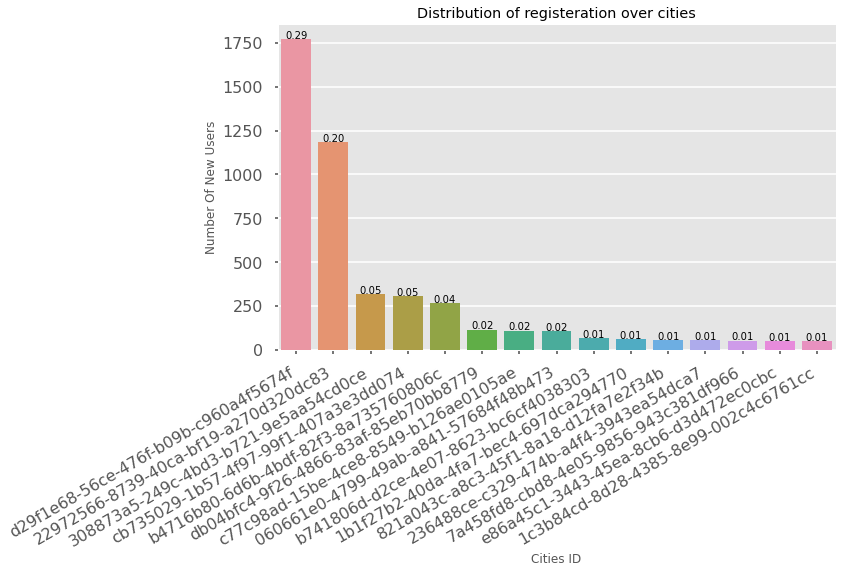

In [26]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

fig= plt.figure(figsize=(10,6)) #figsize

ax = sns.barplot(x="city_uuid", y="Count", orient= '90',  data=cities.head(15))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')

# Add title and axis names
plt.title('Distribution of registeration over cities')
plt.xlabel('Cities ID', fontsize='12')
plt.ylabel('Number Of New Users')

#annotate axis = seaborn axis
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/users_df.shape[0]),
            ha="center") 

# Save graphic
plt.savefig('Images/Distribution of registeration over 15 cities.png',bbox_inches = 'tight')

#### User Registration Growth During Period Given 

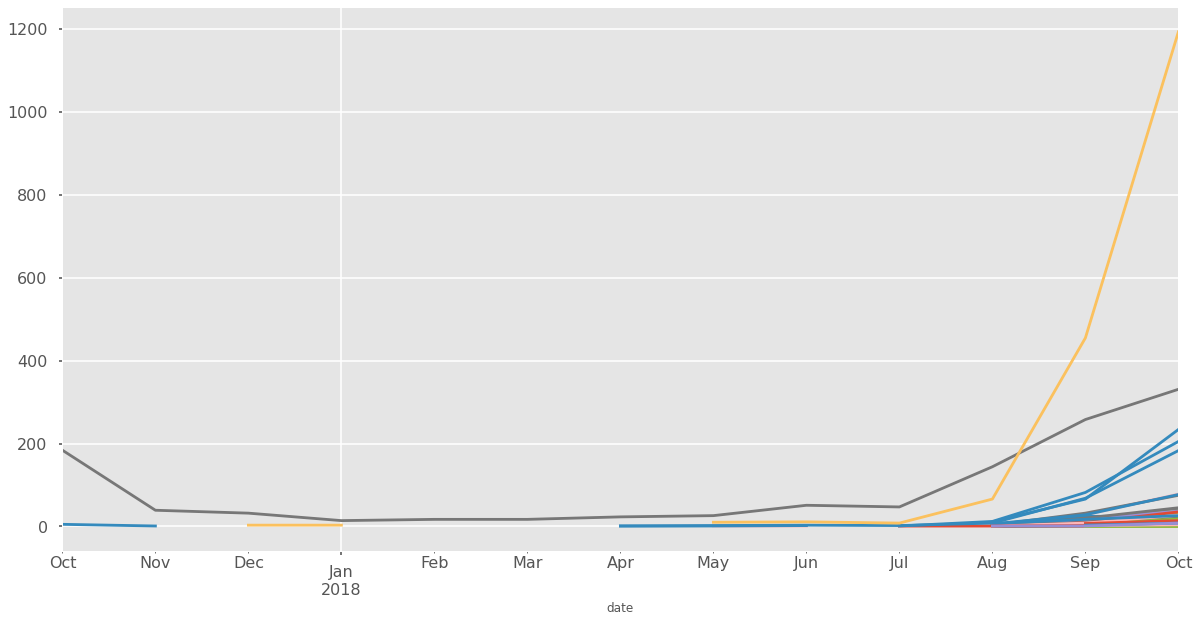

In [42]:
# plot data
fig, ax = plt.subplots(figsize=(20,10))

users_df.groupby([users_df["date"].dt.to_period('M'), users_df.city_uuid],sort=True)['uuid'].count().unstack().plot(ax=ax, legend = False)

In [53]:
city_month_count = pd.DataFrame(users_df.groupby([users_df["date"].dt.to_period('M'), users_df.city_uuid])['uuid'].count())

In [54]:
city_month_count.shape

(494, 1)

In [55]:
city_month_count.head(10)

uuid
date    city_uuid                                 
2017-10 22972566-8739-40ca-bf19-a270d320dc83   184
        22c4976f-4e01-45b9-b05d-0c854e7bd0a0     1
        308873a5-249c-4bd3-b721-9e5aa54cd0ce     5
        4f12d9d2-01ed-4b26-a2f0-b6dc4ae8f398     1
        5796c72a-af37-4ce0-bcfe-9f481ce7ecbe     1
        7a458fd8-cbd8-4e05-9856-943c381df966     1
        821a043c-a8c3-45f1-8a18-d12fa7e2f34b     1
        8921b625-2242-4ff7-ab4d-f23b0c86ae31     1
        907bef2e-4846-44a8-bea1-c5e77c3a328d     2
        a2904f10-a3fe-4682-9efd-b91ccaed2a6d     1

In [56]:
city_month_count = city_month_count[city_month_count['uuid']>=5]

In [57]:
city_month_count.head()

uuid
date    city_uuid                                 
2017-10 22972566-8739-40ca-bf19-a270d320dc83   184
        308873a5-249c-4bd3-b721-9e5aa54cd0ce     5
        d29f1e68-56ce-476f-b09b-c960a4f5674f    17
2017-11 22972566-8739-40ca-bf19-a270d320dc83    39
2017-12 22972566-8739-40ca-bf19-a270d320dc83    32

#### Exploring Users registeration based on Month, Day and Hour

In [38]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   uuid       6000 non-null   object        
 1   city_uuid  6000 non-null   object        
 2   gender     6000 non-null   int64         
 3   date       6000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 187.6+ KB


#### Month

In [59]:
# Create a column containing the month
users_df['month'] = pd.to_datetime(users_df['date']).dt.to_period('M')
months = users_df['month'].sort_values()

month = pd.DataFrame(users_df.month.value_counts())
month.reset_index(inplace = True)
month.rename(columns = {'index' : 'Month','month' : 'Count'}, inplace = True)
month.sort_values(by=['Month'], inplace = True)
month.head()

Month  Count
3   2017-10    226
7   2017-11     41
8   2017-12     36
12  2018-01     18
11  2018-02     18

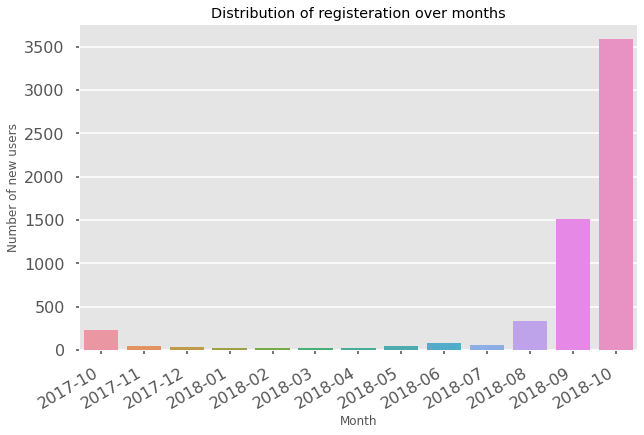

In [62]:
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

fig= plt.figure(figsize=(10,6))
ax = sns.barplot(x="Month", y="Count", orient= '90',  data=month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')

# Add title and axis names
plt.title('Distribution of registeration over months')
plt.xlabel('Month', fontsize='12')
plt.ylabel('Number of new users')


# Show graphic
plt.savefig('Images/Distribution of registeration over months.png',bbox_inches = 'tight')

#### Day

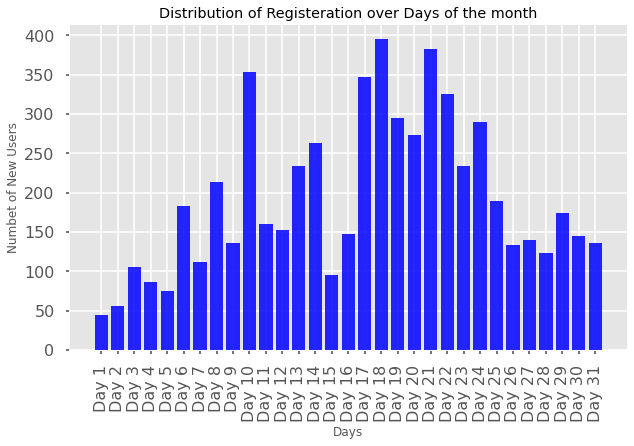

In [78]:
# Daily distribution count
daily_count = users_df.groupby(users_df["date"].dt.day, as_index = False).count()

fig= plt.figure(figsize=(10,6))

# Choose the names of the bars
bars = []
for i in range(1,32):
    bars.append('Day '+str(i))

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, daily_count.date, color = 'Blue', alpha = 0.85)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
plt.yticks()

# Add title and axis names
plt.title('Distribution of Registeration over Days of the month')
plt.xlabel('Days', fontsize='12')
plt.ylabel('Numbet of New Users')

 
# Show graphic
plt.savefig('Images/Distribution of new Users over days.png',bbox_inches = 'tight')
plt.show()


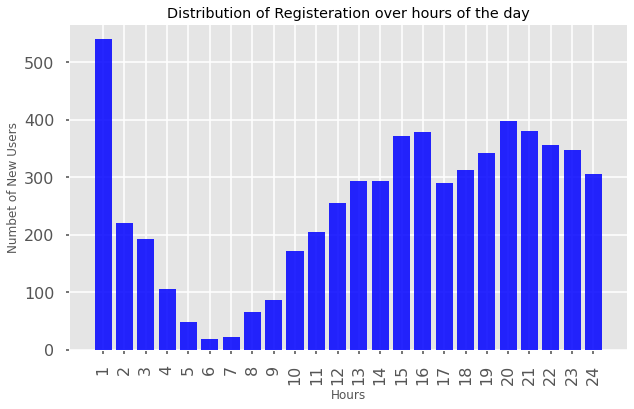

In [79]:
# Monthly distribution count
hourly_count = users_df.groupby(users_df["date"].dt.hour, as_index = False).count()

fig= plt.figure(figsize=(10,6))

# Choose the names of the bars
bars = []
for i in range(1,25):
    bars.append(str(i))

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, hourly_count.date,color = 'Blue', alpha = 0.85)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
plt.yticks()

# Add title and axis names
plt.title('Distribution of Registeration over hours of the day')
plt.xlabel('Hours', fontsize='12')
plt.ylabel('Numbet of New Users')

 
# Show graphic
plt.savefig('Images/Distribution of Registeration over hours.png',bbox_inches = 'tight')
plt.show()

## Follows DataFrame

#### To Do List
1. Most Active Users
2. Users Network (Directed Network)
3. Community Detection
4. Active Users Activites over period given

#### Read Data

In [3]:
follows_df = pd.read_csv('komodaa/follows.csv')
follows_df.head()

user_uuid                           follow_uuid  \
0  7effce15-12ba-469c-b4b4-b529425488db  372fe527-470c-48a3-a95e-fe32cc4bcc15   
1  f262a138-9585-4570-9d2d-6815c4d8b6a6  ca28e52f-ad3f-4ad8-8722-4a0fa355cbcd   
2  18566d57-99ea-4f5d-aa23-7769f1b0dcc2  2098ef7a-9215-4d2e-8e95-0ab7e745392f   
3  958029e7-6897-4ae2-be6c-515730568371  498439f1-52ed-4e3d-b07a-fe77061837b5   
4  4afbf6d4-b841-44b1-8f04-eba6e6b102e3  498439f1-52ed-4e3d-b07a-fe77061837b5   

                  date  
0  2018-10-05 18:47:56  
1  2020-06-29 14:57:37  
2  2019-09-02 08:15:12  
3  2018-09-05 05:02:57  
4  2018-09-06 21:59:08

#### Get familiar with data

In [60]:
follows_df.shape

(5886, 3)

In [62]:
# who follow the most
follows_df['user_uuid'].value_counts().to_frame()

user_uuid
3cef3fd4-984e-481b-89da-c0692bcc529b        277
7f61564b-4203-4fb6-ac6a-2cc555465ed6        119
e5b4f882-7dca-4e63-a665-f412cb383e39        110
e54cea93-9399-47c1-9c57-be1571252e0a        106
5dda1c4a-8b66-440b-896c-8c0be38645b9         79
...                                         ...
c185e8a2-e284-43a8-9316-99a2f4fcd6d3          1
5eb23031-a7ee-4fcb-8c44-5b8b72f1b53e          1
6df1befa-8809-4058-881a-03fb996091a5          1
d781f94d-d479-4d74-8ef4-3470b28d7555          1
85b91b0a-ec55-4768-a31a-79c592935cf0          1

[1454 rows x 1 columns]

In [63]:
# who is followed the most
follows_df['follow_uuid'].value_counts().to_frame()

follow_uuid
233255de-55b8-4a46-800f-172a58016eec          263
17fc2fcd-55d4-4342-a553-302e56d6d816          205
1ed79a26-26f7-4ce9-a711-a4fe0ea5e285          165
3cef3fd4-984e-481b-89da-c0692bcc529b          153
cc998035-b8c6-40bf-b9c9-0edb04b73af7          151
...                                           ...
efe01705-82f2-4fe8-a3a2-b7d3ff0c88b0            1
0586e724-8e8c-4bf5-a003-b5f5a07b2b4a            1
2a8dcb72-b011-495e-a0ff-46c0636f5324            1
c6397905-eb08-4a88-9258-0e4b03af2ee0            1
8970deeb-fe0a-4814-9451-0d567f9f82e1            1

[993 rows x 1 columns]

In [67]:
follows_df['count'] = follows_df['user_uuid'].value_counts()

In [68]:
follows_df.head()

user_uuid                           follow_uuid  \
0  7effce15-12ba-469c-b4b4-b529425488db  372fe527-470c-48a3-a95e-fe32cc4bcc15   
1  f262a138-9585-4570-9d2d-6815c4d8b6a6  ca28e52f-ad3f-4ad8-8722-4a0fa355cbcd   
2  18566d57-99ea-4f5d-aa23-7769f1b0dcc2  2098ef7a-9215-4d2e-8e95-0ab7e745392f   
3  958029e7-6897-4ae2-be6c-515730568371  498439f1-52ed-4e3d-b07a-fe77061837b5   
4  4afbf6d4-b841-44b1-8f04-eba6e6b102e3  498439f1-52ed-4e3d-b07a-fe77061837b5   

                  date  count  
0  2018-10-05 18:47:56    NaN  
1  2020-06-29 14:57:37    NaN  
2  2019-09-02 08:15:12    NaN  
3  2018-09-05 05:02:57    NaN  
4  2018-09-06 21:59:08    NaN

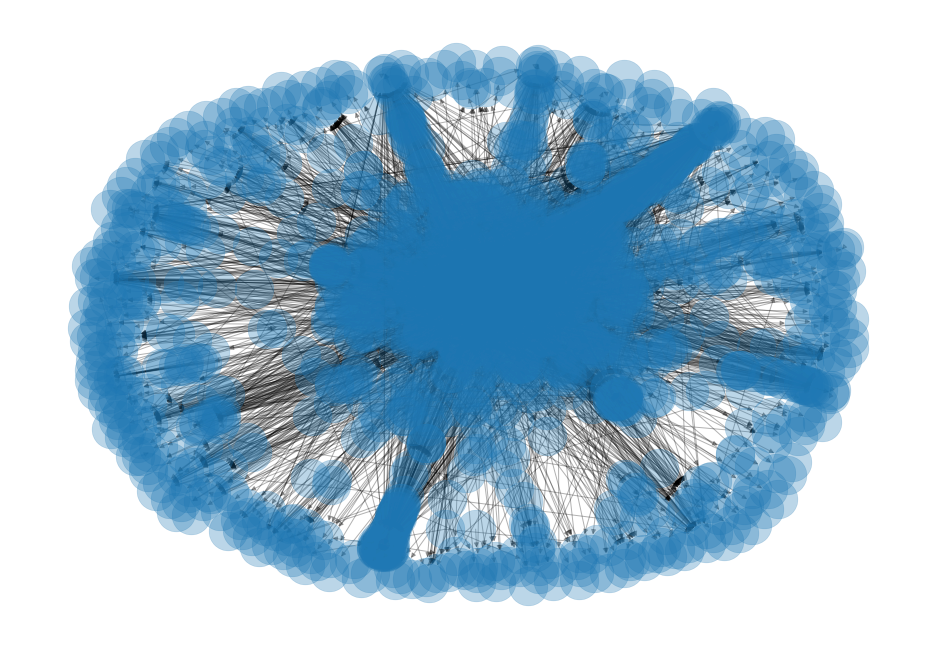

In [69]:
# libraries
import networkx as nx
import matplotlib.pyplot as plt
 
#DIRECTED
G=nx.from_pandas_edgelist(follows_df, 'user_uuid', 'follow_uuid', create_using=nx.DiGraph() )
 
# Make the graph
nx.draw(G, with_labels=False, node_size=1500, alpha=0.3, arrows=True)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
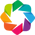

In [13]:
import holoviews as hv
import networkx as nx
from holoviews import opts

hv.extension('bokeh')

defaults = dict(width=1000, height=1000)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

In [14]:
source = follows_df['user_uuid']
target = follows_df['follow_uuid']
simple_graph = hv.Graph(((source, target),))
simple_graph

:Graph   [start,end]

In [78]:
follows_df.head()
follows_df.drop(columns= 'count', inplace = True)

In [79]:
from graphviz import Digraph

G = Digraph(format='jpeg')

G.attr(rankdir='LR', size='25,12')
G.attr('node', shape='circle')

nodelist = []
for idx, row in follows_df.iterrows():
    node1, node2 , d = [str(i) for i in row]

    if node1 not in nodelist:
        G.node(node1)
        nodelist.append(node2)
    if node2 not in nodelist:
        G.node(node2)
        nodelist.append(node2)

    G.edge(node1,node2)

G.render('sg.jpeg', view=True)

'sg.jpeg.jpeg'

In [5]:
nodes = follows_df.user_uuid.unique()

In [6]:
num_nodes = len (nodes)

In [7]:
edges = follows_df[['user_uuid','follow_uuid']]

In [8]:
from graphviz import Digraph
dot = Digraph(comment='VIP graph')

In [46]:
nodes_G = []
for node in edges[:100]['user_uuid']:
    if node not in nodes_G:
        nodes_G.append(node)
for node in edges[:100]['follow_uuid']:
    if node not in nodes_G:
        nodes_G.append(node)

In [47]:
dot = Digraph(comment='VIP graph')
for i in range(len(nodes_G)):
    dot.node(nodes_G[i])
for i in range(len(edges[:10])):
    edge = edges.iloc[i]
    dot.edge(edge['user_uuid'], edge['follow_uuid'])

In [48]:
dot.render('VIP-graph_20.gv', view=True)

'VIP-graph_20.gv.pdf'

In [ ]:
from graphviz import Digraph

G = Digraph(format='jpeg')

G.attr(rankdir='LR', size='8,5')
G.attr('node', shape='circle')

nodelist = []
for idx, row in edges.iterrows():
    node1, node2 = [str(i) for i in row]

    if node1 not in nodelist:
        G.node(node1)
        nodelist.append(node2)
    if node2 not in nodelist:
        G.node(node2)
        nodelist.append(node2)

    G.edge(node1,node2)

G.render('sg', view=True)

In [80]:
follows_df['edge'] = list(zip(follows_df.user_uuid, follows_df.follow_uuid))
follows_df.head()

user_uuid                           follow_uuid  \
0  7effce15-12ba-469c-b4b4-b529425488db  372fe527-470c-48a3-a95e-fe32cc4bcc15   
1  f262a138-9585-4570-9d2d-6815c4d8b6a6  ca28e52f-ad3f-4ad8-8722-4a0fa355cbcd   
2  18566d57-99ea-4f5d-aa23-7769f1b0dcc2  2098ef7a-9215-4d2e-8e95-0ab7e745392f   
3  958029e7-6897-4ae2-be6c-515730568371  498439f1-52ed-4e3d-b07a-fe77061837b5   
4  4afbf6d4-b841-44b1-8f04-eba6e6b102e3  498439f1-52ed-4e3d-b07a-fe77061837b5   

                  date                                               edge  
0  2018-10-05 18:47:56  (7effce15-12ba-469c-b4b4-b529425488db, 372fe52...  
1  2020-06-29 14:57:37  (f262a138-9585-4570-9d2d-6815c4d8b6a6, ca28e52...  
2  2019-09-02 08:15:12  (18566d57-99ea-4f5d-aa23-7769f1b0dcc2, 2098ef7...  
3  2018-09-05 05:02:57  (958029e7-6897-4ae2-be6c-515730568371, 498439f...  
4  2018-09-06 21:59:08  (4afbf6d4-b841-44b1-8f04-eba6e6b102e3, 498439f...

In [84]:
nodes = follows_df['user_uuid'].tolist()
edges = follows_df['edge'].tolist()

In [86]:
nodes[:10]

['7effce15-12ba-469c-b4b4-b529425488db',
 'f262a138-9585-4570-9d2d-6815c4d8b6a6',
 '18566d57-99ea-4f5d-aa23-7769f1b0dcc2',
 '958029e7-6897-4ae2-be6c-515730568371',
 '4afbf6d4-b841-44b1-8f04-eba6e6b102e3',
 '8e7730ec-96b4-4730-820d-9b8b64f7834f',
 '763930ba-0d7f-46dd-8e76-1fe3f18aba17',
 '19cc4b3b-7a64-441d-8e90-c68f9ceb6022',
 '41730565-9335-4b37-9f74-d167a63d7a00',
 'ce1b7a97-e6ac-4e2c-9251-9e69e7331276']

In [87]:
edges[:10]

[('7effce15-12ba-469c-b4b4-b529425488db',
  '372fe527-470c-48a3-a95e-fe32cc4bcc15'),
 ('f262a138-9585-4570-9d2d-6815c4d8b6a6',
  'ca28e52f-ad3f-4ad8-8722-4a0fa355cbcd'),
 ('18566d57-99ea-4f5d-aa23-7769f1b0dcc2',
  '2098ef7a-9215-4d2e-8e95-0ab7e745392f'),
 ('958029e7-6897-4ae2-be6c-515730568371',
  '498439f1-52ed-4e3d-b07a-fe77061837b5'),
 ('4afbf6d4-b841-44b1-8f04-eba6e6b102e3',
  '498439f1-52ed-4e3d-b07a-fe77061837b5'),
 ('8e7730ec-96b4-4730-820d-9b8b64f7834f',
  '498439f1-52ed-4e3d-b07a-fe77061837b5'),
 ('763930ba-0d7f-46dd-8e76-1fe3f18aba17',
  '498439f1-52ed-4e3d-b07a-fe77061837b5'),
 ('19cc4b3b-7a64-441d-8e90-c68f9ceb6022',
  '498439f1-52ed-4e3d-b07a-fe77061837b5'),
 ('41730565-9335-4b37-9f74-d167a63d7a00',
  '498439f1-52ed-4e3d-b07a-fe77061837b5'),
 ('ce1b7a97-e6ac-4e2c-9251-9e69e7331276',
  '8f237e9d-52c7-4ec8-ae23-6898070ba539')]

In [88]:
import networkx as nx

# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node 
G.add_nodes_from(nodes) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edges_from(edges) # Just like nodes we can add edges from a list

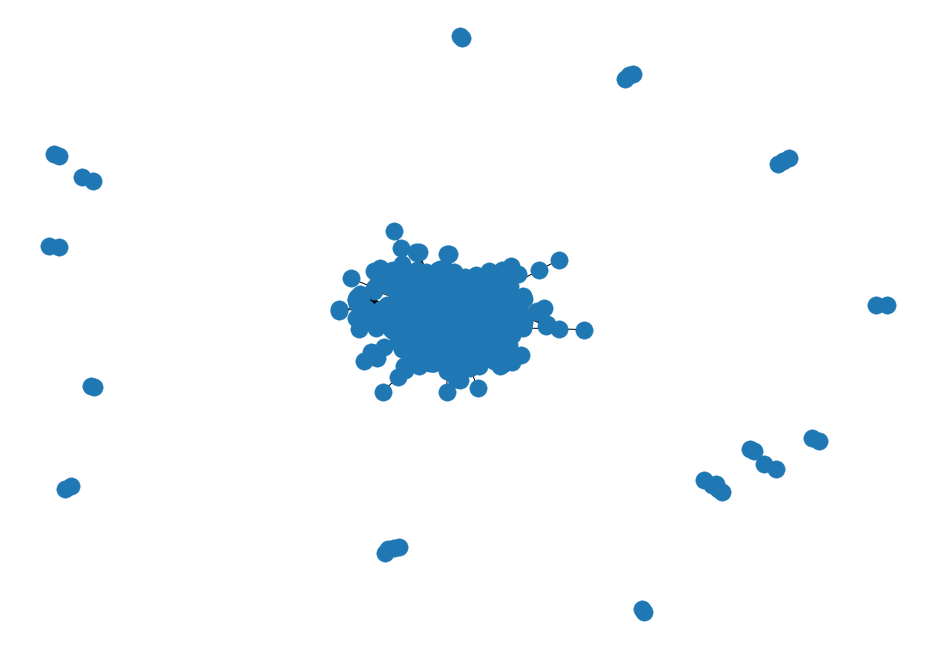

In [90]:
nx.draw(G)

In [94]:
FG = nx.from_pandas_edgelist(follows_df, source='user_uuid', target='follow_uuid', edge_attr=True)

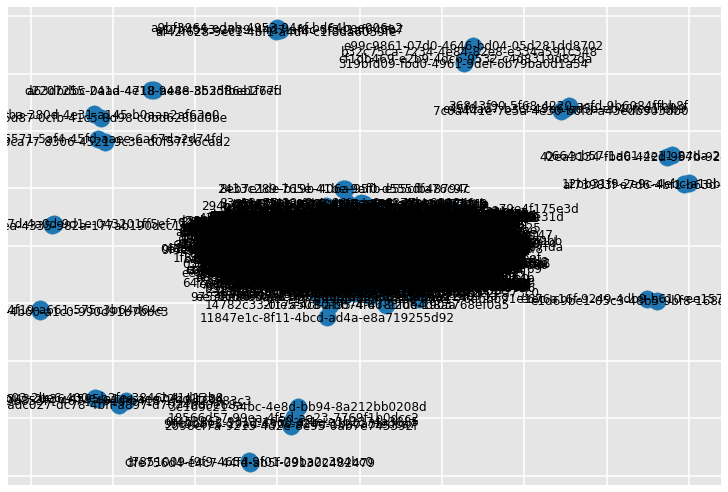

In [97]:
nx.draw_networkx(FG, with_labels=True)

In [98]:
nx.algorithms.degree_centrality(FG) # Notice the 3 airports from which all of our 100 rows of data originates
nx.density(FG) # Average edge density of the Graphs

0.0035064592181665625

In [100]:
nx.average_degree_connectivity(FG) # For a node of degree k - What is the average of its neighbours' degree?

{18: 58.75925925925926,
 2: 94.99644128113879,
 5: 83.17941176470588,
 1: 88.37796373779638,
 4: 85.76639344262296,
 8: 77.65686274509804,
 6: 82.90437158469945,
 21: 61.05952380952381,
 3: 98.6908462867012,
 24: 51.692708333333336,
 30: 40.55,
 36: 45.84027777777778,
 14: 58.84065934065934,
 9: 69.3037037037037,
 16: 71.03125,
 7: 75.8952380952381,
 20: 47.0375,
 11: 76.02479338842976,
 97: 31.22680412371134,
 10: 78.84347826086956,
 111: 28.61261261261261,
 26: 49.87179487179487,
 119: 29.210084033613445,
 25: 44.42285714285714,
 49: 30.714285714285715,
 263: 13.311787072243346,
 55: 38.70909090909091,
 40: 32.8,
 117: 19.324786324786324,
 28: 52.17857142857143,
 93: 24.49462365591398,
 19: 52.357894736842105,
 15: 65.21333333333334,
 48: 31.145833333333332,
 51: 38.07843137254902,
 150: 24.94333333333333,
 12: 71.33333333333333,
 22: 67.02272727272727,
 13: 65.87412587412588,
 17: 57.705882352941174,
 356: 12.21629213483146,
 70: 21.057142857142857,
 56: 48.517857142857146,
 74: 36.

## Products DataFrame

#### To Do List
1. Users with Most Items
2. Most popular Category
3. Cities with most Item
4. New vs Old
5. Homemade vs Manufacture
6. Orginal Price Distribution
7. Price Distribution
8. Items with most Discount
9. Most Generous Cities
10. Most Generous users
11. Items with most Comments
12. Items with most bookmarks
13. Gender Distiribution of the items
14. Seasons and categories
15. Seasons and price


#### Read Data

In [4]:
products_df = pd.read_csv('komodaa/products.csv')
products_df.head()

uuid                             user_uuid  \
0  33949611-a3e4-440a-83b1-6cc1a2602b8b  06abe0e5-c408-4a33-9d81-5bfacc891f15   
1  a55fbc5e-b0b1-43c8-b25b-57685d2ee242  16848d64-b555-4182-a5b4-c0ae1e850e01   
2  d895881f-6570-4ab6-9756-367c12b1ab44  16848d64-b555-4182-a5b4-c0ae1e850e01   
3  c0a45353-2453-442f-ae45-d741ac5ecdc3  16848d64-b555-4182-a5b4-c0ae1e850e01   
4  00871ece-294a-4b1e-be51-2d72ac1205f7  16848d64-b555-4182-a5b4-c0ae1e850e01   

                          category_uuid                             city_uuid  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
2  8ff26775-1571-4a9e-904c-cd7951ba93ea  22972566-8739-40ca-bf19-a270d320dc83   
3  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
4  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   15000               0   
1       1            0          550000  300000               0   
2       1            0           92000   50000               1   
3       1            0          310000  230000               6   
4       1            0          310000  230000               4   

   bookmarks_count  gender                 date  
0                0       1  2019-12-19 02:42:28  
1                1       1  2019-12-19 02:42:28  
2                4       1  2019-12-19 02:42:28  
3                1       1  2020-04-19 14:49:54  
4                0       1  2020-04-19 14:53:57

#### Get familiar with data

In [102]:
products_df.shape

(22893, 12)

In [134]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22893 entries, 0 to 22892
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   uuid             22893 non-null  object
 1   user_uuid        22893 non-null  object
 2   category_uuid    22893 non-null  object
 3   city_uuid        22893 non-null  object
 4   is_new           22893 non-null  int64 
 5   is_homemade      22893 non-null  int64 
 6   original_price   22893 non-null  int64 
 7   price            22893 non-null  int64 
 8   comments_count   22893 non-null  int64 
 9   bookmarks_count  22893 non-null  int64 
 10  gender           22893 non-null  int64 
 11  date             22893 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.1+ MB


In [103]:
products_df.describe()

is_new   is_homemade  original_price         price  \
count  22893.000000  22893.000000    2.289300e+04  2.289300e+04   
mean       0.505351      0.039619    1.516705e+06  2.266964e+05   
std        0.499982      0.195067    4.960554e+07  1.553110e+07   
min        0.000000      0.000000    0.000000e+00  0.000000e+00   
25%        0.000000      0.000000    6.000000e+04  2.700000e+04   
50%        1.000000      0.000000    1.200000e+05  5.000000e+04   
75%        1.000000      0.000000    2.000000e+05  9.000000e+04   
max        1.000000      1.000000    2.147484e+09  2.147484e+09   

       comments_count  bookmarks_count   gender  
count    22893.000000     22893.000000  22893.0  
mean         1.747215         4.979775      1.0  
std          4.348163        11.320011      0.0  
min          0.000000         0.000000      1.0  
25%          0.000000         0.000000      1.0  
50%          0.000000         2.000000      1.0  
75%          2.000000         5.000000      1.0  
max        115.000000       272.000000      1.0

In [104]:
missing_percentage = products_df.isnull().sum() / products_df.shape[0] * 100
missing_percentage

uuid               0.0
user_uuid          0.0
category_uuid      0.0
city_uuid          0.0
is_new             0.0
is_homemade        0.0
original_price     0.0
price              0.0
comments_count     0.0
bookmarks_count    0.0
gender             0.0
date               0.0
dtype: float64

#### Users with Most Items

In [116]:
user_item = products_df['user_uuid'].value_counts().to_frame()
user_item.rename(columns = {'user_uuid': 'count' }, inplace = True)

In [118]:
user_item.head()

count
c82ae641-c46d-45b8-8655-b31cc4710cbc    315
abf55690-de58-4b4e-964f-8cddcecc0ae6    245
17fc2fcd-55d4-4342-a553-302e56d6d816    232
cc998035-b8c6-40bf-b9c9-0edb04b73af7    216
1f071331-6d80-4083-8401-e77a12ccab00    195

In [128]:
len(user_item)

2546

In [127]:
products_df['user_uuid'].nunique()

2546

In [130]:
print('We have {} user with more than one Item for sale'.format(len(user_item[user_item['count']>1])))
print('We have {} user with just one Item for sale'.format(len(user_item[user_item['count']==1])))

We have 1907 user with more than one Item for sale
We have 639 user with just one Item for sale


Text(0, 0.5, 'Frequency')

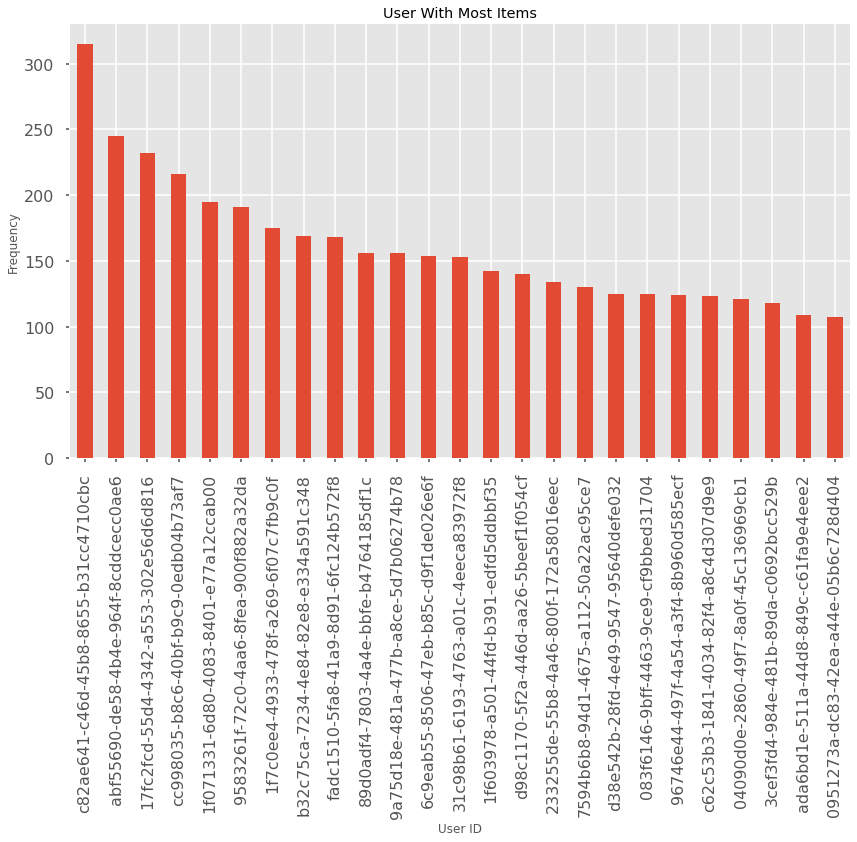

In [133]:
ax = products_df['user_uuid'].value_counts().nlargest(25).plot(kind='bar',
                                    figsize=(14,8),
                                    title="User With Most Items")
ax.set_xlabel("User ID")
ax.set_ylabel("Frequency")

In [135]:
products_df.head()

uuid                             user_uuid  \
0  33949611-a3e4-440a-83b1-6cc1a2602b8b  06abe0e5-c408-4a33-9d81-5bfacc891f15   
1  a55fbc5e-b0b1-43c8-b25b-57685d2ee242  16848d64-b555-4182-a5b4-c0ae1e850e01   
2  d895881f-6570-4ab6-9756-367c12b1ab44  16848d64-b555-4182-a5b4-c0ae1e850e01   
3  c0a45353-2453-442f-ae45-d741ac5ecdc3  16848d64-b555-4182-a5b4-c0ae1e850e01   
4  00871ece-294a-4b1e-be51-2d72ac1205f7  16848d64-b555-4182-a5b4-c0ae1e850e01   

                          category_uuid                             city_uuid  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
2  8ff26775-1571-4a9e-904c-cd7951ba93ea  22972566-8739-40ca-bf19-a270d320dc83   
3  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
4  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   15000               0   
1       1            0          550000  300000               0   
2       1            0           92000   50000               1   
3       1            0          310000  230000               6   
4       1            0          310000  230000               4   

   bookmarks_count  gender                 date  
0                0       1  2019-12-19 02:42:28  
1                1       1  2019-12-19 02:42:28  
2                4       1  2019-12-19 02:42:28  
3                1       1  2020-04-19 14:49:54  
4                0       1  2020-04-19 14:53:57

In [8]:
products_df[products_df['user_uuid']=='c82ae641-c46d-45b8-8655-b31cc4710cbc'].head()

uuid  \
1513  1ea17a16-832a-4284-ab87-ad278b69bb23   
1514  79f1d3a1-ab92-44c1-b296-7fa94c29b847   
1515  f057d839-4af5-42d0-a968-43662b27a134   
1516  20ccdc40-f8ca-4659-85fa-b34c381a6a37   
1517  0425e6db-6773-4ae1-8542-26a3c6d9dcd6   

                                 user_uuid  \
1513  c82ae641-c46d-45b8-8655-b31cc4710cbc   
1514  c82ae641-c46d-45b8-8655-b31cc4710cbc   
1515  c82ae641-c46d-45b8-8655-b31cc4710cbc   
1516  c82ae641-c46d-45b8-8655-b31cc4710cbc   
1517  c82ae641-c46d-45b8-8655-b31cc4710cbc   

                             category_uuid  \
1513  aa9c2861-90e8-4210-994b-332ecab092fd   
1514  aa9c2861-90e8-4210-994b-332ecab092fd   
1515  aa9c2861-90e8-4210-994b-332ecab092fd   
1516  aa9c2861-90e8-4210-994b-332ecab092fd   
1517  aa9c2861-90e8-4210-994b-332ecab092fd   

                                 city_uuid  is_new  is_homemade  \
1513  22972566-8739-40ca-bf19-a270d320dc83       1            0   
1514  22972566-8739-40ca-bf19-a270d320dc83       0            0   
1515  22972566-8739-40ca-bf19-a270d320dc83       0            0   
1516  22972566-8739-40ca-bf19-a270d320dc83       0            0   
1517  22972566-8739-40ca-bf19-a270d320dc83       0            0   

      original_price   price  comments_count  bookmarks_count  gender  \
1513           60000   20000               0                2       1   
1514               0   50000               0                0       1   
1515               0  100000               0                0       1   
1516               0   15000               0                0       1   
1517               0   20000               0                5       1   

                     date  
1513  2019-12-19 02:42:28  
1514  2019-12-19 02:42:28  
1515  2019-12-19 02:42:28  
1516  2019-12-19 02:42:28  
1517  2019-12-19 02:42:28

In [9]:
city_user_count = pd.DataFrame(products_df.groupby([products_df["city_uuid"], products_df.user_uuid])['user_uuid'].count())

In [10]:
city_user_count.rename(columns = {'user_uuid' : 'Number of items'}, inplace = True)
city_user_count.head(15)

Number of items
city_uuid                            user_uuid                                            
00a6e24d-57b3-4284-97ad-82ab78f7e97d 3837c62f-bfa8-4c85-91a4-5a15d6b94201                2
017fea31-2ded-4a6f-b9cf-3e4a9d0fb799 0023faeb-5abe-43fd-9c04-8f6701e55dfb                3
                                     077fadd1-a057-4113-9c13-65934750c036                1
                                     083f6146-9bff-4463-9ce9-cf9bbed31704               42
                                     0a4c7c0f-198f-4a87-bc7d-4dae99a65b37               12
                                     0a656b90-aa36-49d0-acbc-ff68c05044a5                4
                                     0cde3f49-6a45-4913-a2be-1833b41f46d6                2
                                     0fe638c4-27c6-4648-8562-3af24fec776c                5
                                     1033d7f2-e3de-43ab-a9fe-0b35c2fddc89                1
                                     10f7fb35-5a76-4aa6-b814-e09b8d6eec59                5
                                     112825fa-dd5f-42aa-a3b7-e1bc558c38ab                1
                                     114a3247-5226-460f-850f-3d53ad112ed1                3
                                     1193ff6c-1324-40f2-bd11-a0774e143f84                2
                                     1201dcf2-ece2-4438-b9ca-324646255107                3
                                     1391ffc9-e33b-4095-ada6-a8bedcc551a8                2

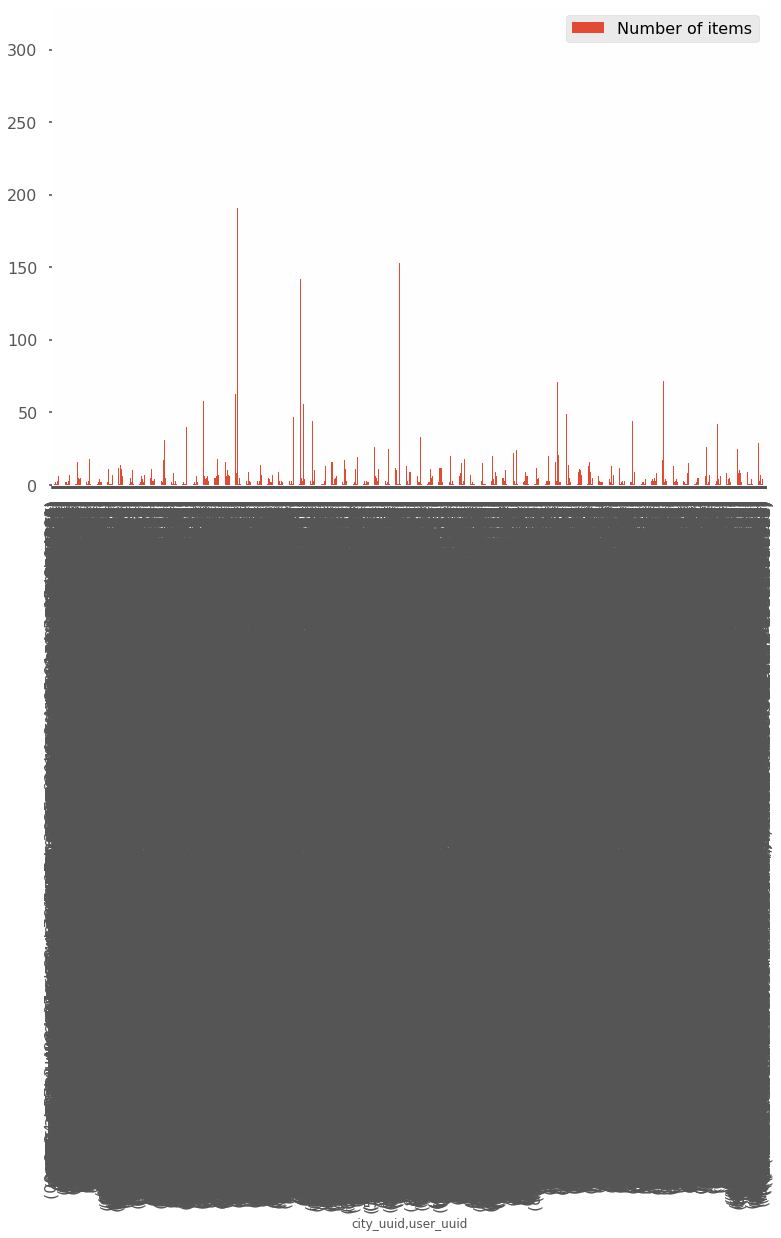

In [147]:
city_user_count.plot.bar()

In [ ]:
# products_df.groupby([products_df["city_uuid"], products_df.user_uuid]).size().unstack(fill_value=0).plot.bar()

In [ ]:
# pd.crosstab(products_df['city_uuid'],products_df['user_uuid']).plot.bar()

#### Most popular Category

In [11]:
products_df.head()

uuid                             user_uuid  \
0  33949611-a3e4-440a-83b1-6cc1a2602b8b  06abe0e5-c408-4a33-9d81-5bfacc891f15   
1  a55fbc5e-b0b1-43c8-b25b-57685d2ee242  16848d64-b555-4182-a5b4-c0ae1e850e01   
2  d895881f-6570-4ab6-9756-367c12b1ab44  16848d64-b555-4182-a5b4-c0ae1e850e01   
3  c0a45353-2453-442f-ae45-d741ac5ecdc3  16848d64-b555-4182-a5b4-c0ae1e850e01   
4  00871ece-294a-4b1e-be51-2d72ac1205f7  16848d64-b555-4182-a5b4-c0ae1e850e01   

                          category_uuid                             city_uuid  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
2  8ff26775-1571-4a9e-904c-cd7951ba93ea  22972566-8739-40ca-bf19-a270d320dc83   
3  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
4  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   15000               0   
1       1            0          550000  300000               0   
2       1            0           92000   50000               1   
3       1            0          310000  230000               6   
4       1            0          310000  230000               4   

   bookmarks_count  gender                 date  
0                0       1  2019-12-19 02:42:28  
1                1       1  2019-12-19 02:42:28  
2                4       1  2019-12-19 02:42:28  
3                1       1  2020-04-19 14:49:54  
4                0       1  2020-04-19 14:53:57

In [15]:
products_df['category_uuid'].value_counts().to_frame()

category_uuid
aa9c2861-90e8-4210-994b-332ecab092fd          19852
c017d107-84c1-4586-9cf5-b9858aa5ee89            519
0592663e-1848-4280-87b2-0ae0f95355a4            332
4c7be4f5-66cd-43fa-833e-92f003cb0b97            213
629f8836-8f7f-41e7-8a73-df0e7d623036            190
...                                             ...
c2d8bd72-3e93-4db8-8b2f-47825445928d              1
5391a538-1c30-4822-823f-f52653d36d45              1
662878cf-2e1a-4a4c-8c87-7c6357e09eef              1
f72236d2-2362-412d-93d8-2da09203a3d4              1
a2ab5b87-7d29-4c7f-bcfa-b91ac733c7aa              1

[95 rows x 1 columns]

In [20]:
print('We have {} Categoty with items for sale.'.format(products_df['category_uuid'].nunique()))

We have 95 Categoty with items for sale.


Text(0, 0.5, 'Frequency')

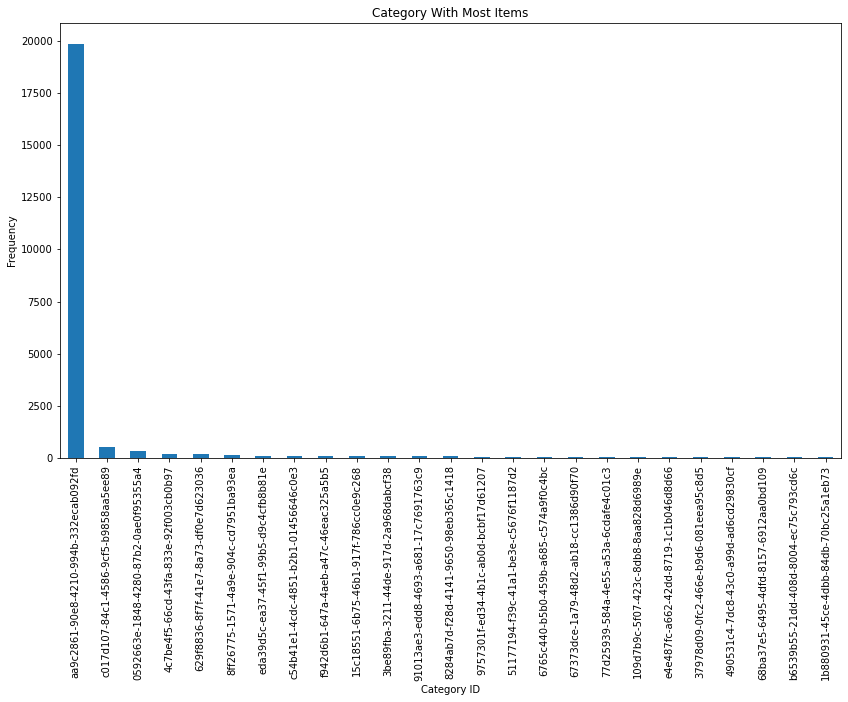

In [18]:
ax = products_df['category_uuid'].value_counts().nlargest(25).plot(kind='bar',
                                    figsize=(14,8),
                                    title="Category With Most Items")
ax.set_xlabel("Category ID")
ax.set_ylabel("Frequency")

####  Cities with most Item

In [19]:
products_df['city_uuid'].value_counts().to_frame()

city_uuid
d29f1e68-56ce-476f-b09b-c960a4f5674f       6531
22972566-8739-40ca-bf19-a270d320dc83       5454
b4716b80-6d6b-4bdf-82f3-8a735760806c       1506
308873a5-249c-4bd3-b721-9e5aa54cd0ce       1007
017fea31-2ded-4a6f-b9cf-3e4a9d0fb799        886
...                                         ...
b1482ec4-90c2-4960-a9f2-b9326059b883          1
f0293a62-e0e4-49a1-a669-4eeb985483d1          1
80353082-00d3-4f43-8eef-dc486d81b9aa          1
f8599cf8-1268-43d4-9fd9-3df9cdf5963d          1
efc476bf-3010-411b-bdc9-848ccbc02e6c          1

[193 rows x 1 columns]

In [21]:
print('We have {} cities with items for sale.'.format(products_df['city_uuid'].nunique()))

We have 193 cities with items for sale.


Text(0, 0.5, 'Frequency')

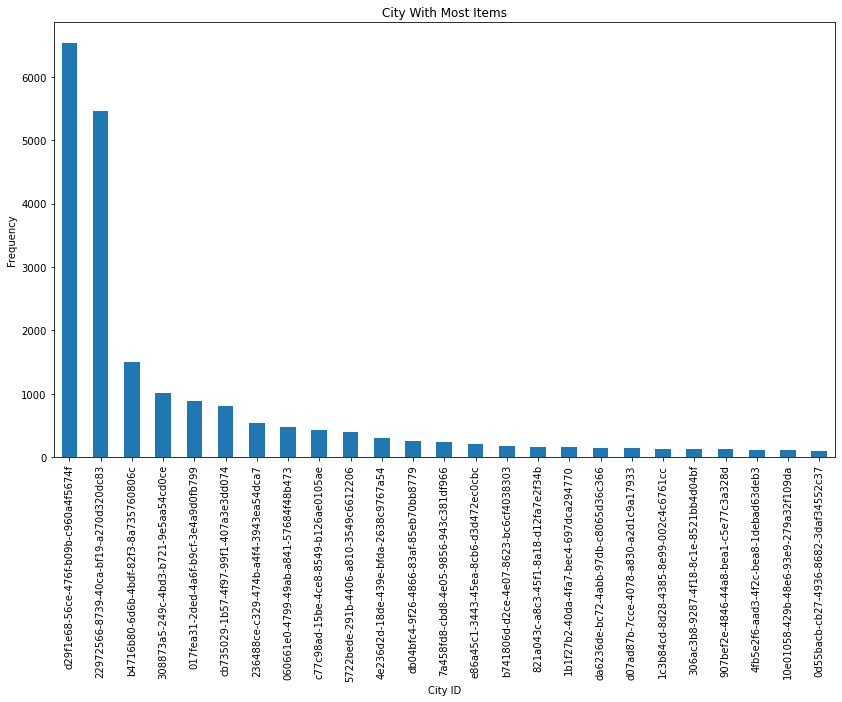

In [22]:
ax = products_df['city_uuid'].value_counts().nlargest(25).plot(kind='bar',
                                    figsize=(14,8),
                                    title="City With Most Items")
ax.set_xlabel("City ID")
ax.set_ylabel("Frequency")

#### New vs Old

Text(0, 0.5, 'Frequency')

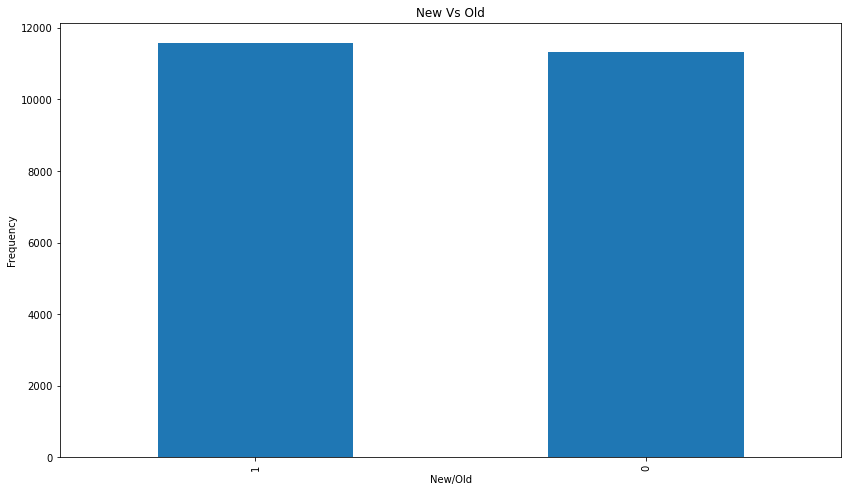

In [23]:
ax = products_df['is_new'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="New Vs Old")
ax.set_xlabel("New/Old")
ax.set_ylabel("Frequency")

#### Homemade vs Manufacture

Text(0, 0.5, 'Frequency')

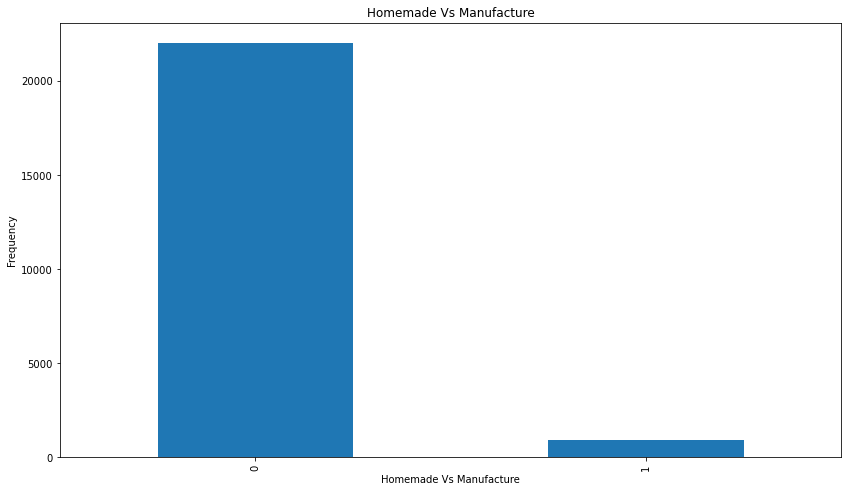

In [25]:
ax = products_df['is_homemade'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Homemade Vs Manufacture")
ax.set_xlabel("Homemade Vs Manufacture")
ax.set_ylabel("Frequency")

#### Orginal Price Distribution

In [117]:
products_df.original_price.describe()

count    2.289300e+04
mean     1.516705e+06
std      4.960554e+07
min      0.000000e+00
25%      6.000000e+04
50%      1.200000e+05
75%      2.000000e+05
max      2.147484e+09
Name: original_price, dtype: float64

In [119]:
products_df['original_price'].value_counts().to_frame().reset_index()

index  original_price
0     150000            1218
1     100000            1182
2          0            1143
3     120000            1093
4      50000             930
..       ...             ...
475   239000               1
476   354000               1
477   687580               1
478   993000               1
479  1540000               1

[480 rows x 2 columns]

count    2.289300e+04
mean     1.516705e+06
std      4.960554e+07
min      0.000000e+00
25%      6.000000e+04
50%      1.200000e+05
75%      2.000000e+05
max      2.147484e+09
Name: original_price, dtype: float64


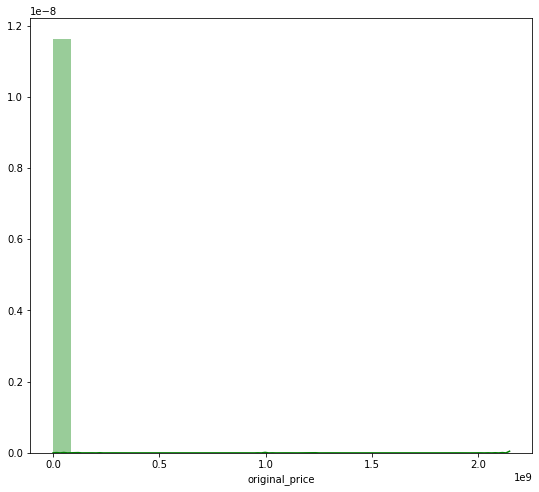

In [3]:
plt.figure(figsize=(9, 8))
sns.distplot(products_df['original_price'], color='g', bins=25, hist_kws={'alpha': 0.4});

In [35]:
print('The highest price: ',products_df['original_price'].max())
print('The highest price: ',products_df['original_price'].min())

The highest price:  2147483647
The highest price:  0


It seems your histogram is heavily Long-Tailed. As we have prices up to 2*1e9 while the majority of data are much smaller, in the order of 1e6. So the bin=25 parameter does such that the first bin includes almost all of the data. 
We should use logarithmic bins 

In [4]:
price = products_df[['original_price','price']]
price = price[price['original_price']!=0]

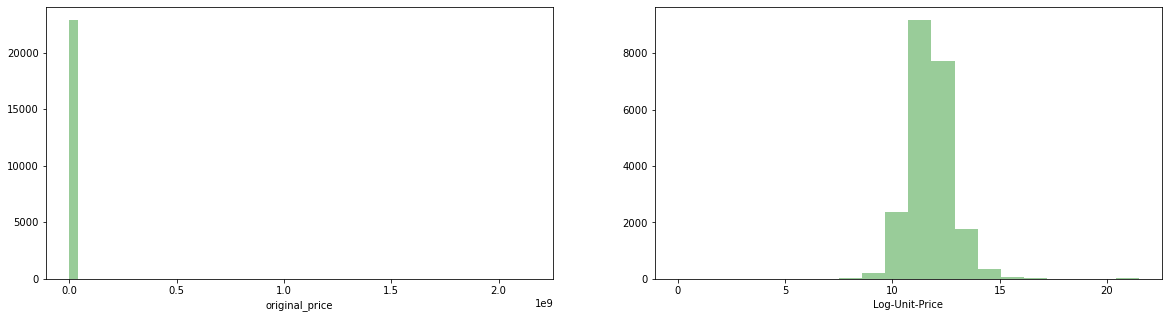

In [6]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(products_df.original_price, ax=ax[0], kde=False, color="g")
sns.distplot(np.log(price['original_price']), ax=ax[1], bins=20, color="g", kde=False)
ax[1].set_xlabel("Log-Unit-Price");

In [9]:
products_df['bucket_org'] = pd.cut(products_df.original_price, 100000)
products_df.head()

uuid                             user_uuid  \
0  33949611-a3e4-440a-83b1-6cc1a2602b8b  06abe0e5-c408-4a33-9d81-5bfacc891f15   
1  a55fbc5e-b0b1-43c8-b25b-57685d2ee242  16848d64-b555-4182-a5b4-c0ae1e850e01   
2  d895881f-6570-4ab6-9756-367c12b1ab44  16848d64-b555-4182-a5b4-c0ae1e850e01   
3  c0a45353-2453-442f-ae45-d741ac5ecdc3  16848d64-b555-4182-a5b4-c0ae1e850e01   
4  00871ece-294a-4b1e-be51-2d72ac1205f7  16848d64-b555-4182-a5b4-c0ae1e850e01   

                          category_uuid                             city_uuid  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
2  8ff26775-1571-4a9e-904c-cd7951ba93ea  22972566-8739-40ca-bf19-a270d320dc83   
3  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
4  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   15000               0   
1       1            0          550000  300000               0   
2       1            0           92000   50000               1   
3       1            0          310000  230000               6   
4       1            0          310000  230000               4   

   bookmarks_count  gender                 date                     bucket  \
0                0       1  2019-12-19 02:42:28  (-2147483.647, 21474.836]   
1                1       1  2019-12-19 02:42:28   (279172.874, 300647.711]   
2                4       1  2019-12-19 02:42:28     (42949.673, 64424.509]   
3                1       1  2020-04-19 14:49:54   (214748.365, 236223.201]   
4                0       1  2020-04-19 14:53:57   (214748.365, 236223.201]   

                  bucket_org  
0  (-2147483.647, 21474.836]  
1   (536870.912, 558345.748]  
2    (85899.346, 107374.182]  
3   (300647.711, 322122.547]  
4   (300647.711, 322122.547]

In [10]:
newdf = products_df[['bucket_org','uuid']].groupby('bucket_org').count()
newdf.head()

uuid
bucket_org                     
(-2147483.647, 21474.836]  1684
(21474.836, 42949.673]     1700
(42949.673, 64424.509]     2578
(64424.509, 85899.346]     2750
(85899.346, 107374.182]    2249

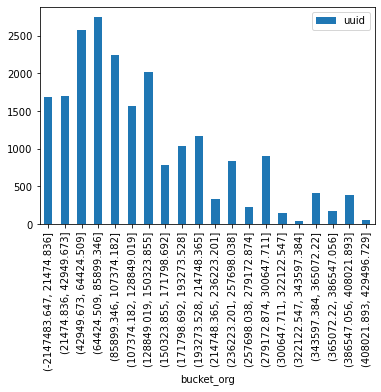

In [11]:
newdf.head(20).plot(kind='bar')

#### Price Distribution

In [120]:
products_df.price.describe()

count    2.289300e+04
mean     2.266964e+05
std      1.553110e+07
min      0.000000e+00
25%      2.700000e+04
50%      5.000000e+04
75%      9.000000e+04
max      2.147484e+09
Name: price, dtype: float64

In [121]:
products_df['price'].value_counts().to_frame().reset_index()

index  price
0      50000   1486
1      30000   1396
2      40000   1158
3      20000   1142
4      25000   1041
..       ...    ...
381   740000      1
382    55001      1
383   101000      1
384  1450000      1
385    75555      1

[386 rows x 2 columns]

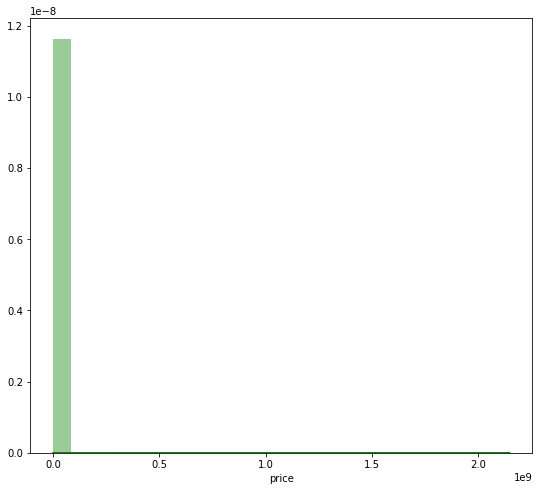

In [122]:
plt.figure(figsize=(9, 8))
sns.distplot(products_df['price'], color='g', bins=25, hist_kws={'alpha': 0.4});

In [8]:
print('The highest price: ',products_df['price'].max())
print('The highest price: ',products_df['price'].min())

The highest price:  2147483647
The highest price:  0


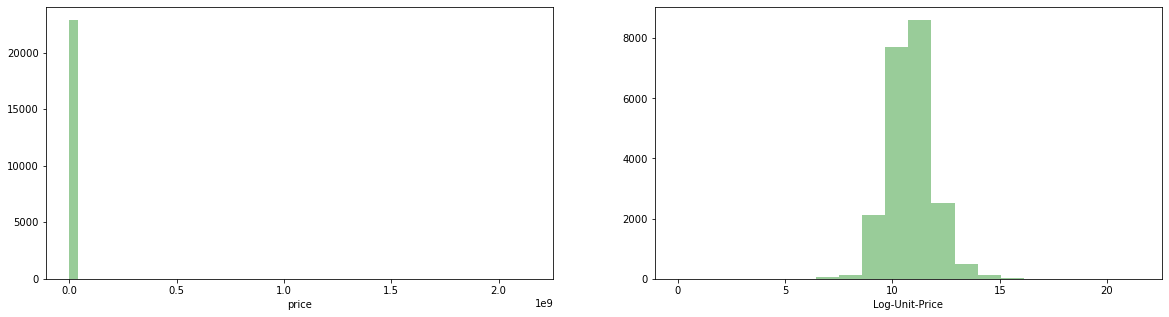

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(products_df.price, ax=ax[0], kde=False, color="g")
sns.distplot(np.log(price['price']), ax=ax[1], bins=20, color="g", kde=False)
ax[1].set_xlabel("Log-Unit-Price");

In [3]:
products_df['bucket'] = pd.cut(products_df.price, 100000)
products_df.head()

uuid                             user_uuid  \
0  33949611-a3e4-440a-83b1-6cc1a2602b8b  06abe0e5-c408-4a33-9d81-5bfacc891f15   
1  a55fbc5e-b0b1-43c8-b25b-57685d2ee242  16848d64-b555-4182-a5b4-c0ae1e850e01   
2  d895881f-6570-4ab6-9756-367c12b1ab44  16848d64-b555-4182-a5b4-c0ae1e850e01   
3  c0a45353-2453-442f-ae45-d741ac5ecdc3  16848d64-b555-4182-a5b4-c0ae1e850e01   
4  00871ece-294a-4b1e-be51-2d72ac1205f7  16848d64-b555-4182-a5b4-c0ae1e850e01   

                          category_uuid                             city_uuid  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
2  8ff26775-1571-4a9e-904c-cd7951ba93ea  22972566-8739-40ca-bf19-a270d320dc83   
3  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
4  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   15000               0   
1       1            0          550000  300000               0   
2       1            0           92000   50000               1   
3       1            0          310000  230000               6   
4       1            0          310000  230000               4   

   bookmarks_count  gender                 date                     bucket  
0                0       1  2019-12-19 02:42:28  (-2147483.647, 21474.836]  
1                1       1  2019-12-19 02:42:28   (279172.874, 300647.711]  
2                4       1  2019-12-19 02:42:28     (42949.673, 64424.509]  
3                1       1  2020-04-19 14:49:54   (214748.365, 236223.201]  
4                0       1  2020-04-19 14:53:57   (214748.365, 236223.201]

In [4]:
newdf = products_df[['bucket','uuid']].groupby('bucket').count()
newdf.head()

uuid
bucket                         
(-2147483.647, 21474.836]  4308
(21474.836, 42949.673]     5891
(42949.673, 64424.509]     4059
(64424.509, 85899.346]     2634
(85899.346, 107374.182]    1724

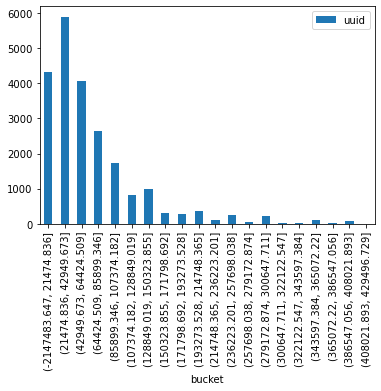

In [8]:
newdf.head(20).plot(kind='bar')

#### Items with most Discount

In [12]:
products_df['discount']= products_df['original_price'] - products_df['price']

In [13]:
products_df.head()

uuid                             user_uuid  \
0  33949611-a3e4-440a-83b1-6cc1a2602b8b  06abe0e5-c408-4a33-9d81-5bfacc891f15   
1  a55fbc5e-b0b1-43c8-b25b-57685d2ee242  16848d64-b555-4182-a5b4-c0ae1e850e01   
2  d895881f-6570-4ab6-9756-367c12b1ab44  16848d64-b555-4182-a5b4-c0ae1e850e01   
3  c0a45353-2453-442f-ae45-d741ac5ecdc3  16848d64-b555-4182-a5b4-c0ae1e850e01   
4  00871ece-294a-4b1e-be51-2d72ac1205f7  16848d64-b555-4182-a5b4-c0ae1e850e01   

                          category_uuid                             city_uuid  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
2  8ff26775-1571-4a9e-904c-cd7951ba93ea  22972566-8739-40ca-bf19-a270d320dc83   
3  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
4  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   15000               0   
1       1            0          550000  300000               0   
2       1            0           92000   50000               1   
3       1            0          310000  230000               6   
4       1            0          310000  230000               4   

   bookmarks_count  gender                 date                     bucket  \
0                0       1  2019-12-19 02:42:28  (-2147483.647, 21474.836]   
1                1       1  2019-12-19 02:42:28   (279172.874, 300647.711]   
2                4       1  2019-12-19 02:42:28     (42949.673, 64424.509]   
3                1       1  2020-04-19 14:49:54   (214748.365, 236223.201]   
4                0       1  2020-04-19 14:53:57   (214748.365, 236223.201]   

                  bucket_org  discount  
0  (-2147483.647, 21474.836]    -15000  
1   (536870.912, 558345.748]    250000  
2    (85899.346, 107374.182]     42000  
3   (300647.711, 322122.547]     80000  
4   (300647.711, 322122.547]     80000

In [21]:
products_df.sort_values('discount', inplace = True , ascending=False)
products_df.head(10)

uuid  \
10814  56d54b87-3a0f-4164-94d5-0217aa7bb8de   
638    f7858eea-4370-410f-a77d-1260376e9f9f   
8513   87a5959f-8fdb-4966-9989-311c805932b2   
8514   c619c0ae-8f1f-412d-ab85-a54145a4cbe0   
639    82fbd4f9-47a1-445a-bbe8-72b687d2ac79   
8512   1ad1eb2a-cecd-4587-b600-48b938a46c54   
16928  bc93da07-1042-4e5f-bb92-e8744c4705ba   
8222   81f8aea1-63d9-467f-948d-1836c16a0b25   
3691   3a4ec096-bea6-4950-90a0-9722a17eced1   
11730  3e701330-e906-43d3-9700-dfae1c3b2592   

                                  user_uuid  \
10814  a9502826-05f5-4551-84b7-4ab459715245   
638    85ba8dcc-eab6-47fb-a112-0f4fe72ef5a0   
8513   0d5f59d7-54db-46e5-866b-96ddf97f69db   
8514   0d5f59d7-54db-46e5-866b-96ddf97f69db   
639    85ba8dcc-eab6-47fb-a112-0f4fe72ef5a0   
8512   0d5f59d7-54db-46e5-866b-96ddf97f69db   
16928  b9014d2a-f1e2-4f04-9481-5803ba68dd29   
8222   14b8bbd2-eb47-4138-a262-e8f09b775f33   
3691   20de7c58-b721-40ea-933b-999f6d396d3a   
11730  2106d03c-9c05-4e96-a7b4-8b2bf9258c3a   

                              category_uuid  \
10814  aa9c2861-90e8-4210-994b-332ecab092fd   
638    aa9c2861-90e8-4210-994b-332ecab092fd   
8513   aa9c2861-90e8-4210-994b-332ecab092fd   
8514   aa9c2861-90e8-4210-994b-332ecab092fd   
639    aa9c2861-90e8-4210-994b-332ecab092fd   
8512   aa9c2861-90e8-4210-994b-332ecab092fd   
16928  aa9c2861-90e8-4210-994b-332ecab092fd   
8222   aa9c2861-90e8-4210-994b-332ecab092fd   
3691   aa9c2861-90e8-4210-994b-332ecab092fd   
11730  aa9c2861-90e8-4210-994b-332ecab092fd   

                                  city_uuid  is_new  is_homemade  \
10814  1b1f27b2-40da-4fa7-bec4-697dca294770       1            0   
638    d29f1e68-56ce-476f-b09b-c960a4f5674f       0            0   
8513   308873a5-249c-4bd3-b721-9e5aa54cd0ce       1            0   
8514   308873a5-249c-4bd3-b721-9e5aa54cd0ce       1            0   
639    d29f1e68-56ce-476f-b09b-c960a4f5674f       0            0   
8512   308873a5-249c-4bd3-b721-9e5aa54cd0ce       1            0   
16928  abc73f98-bb8d-4606-923e-60094433a9b0       1            0   
8222   59c39f09-0334-4a80-91d2-5bef8ad778ea       0            0   
3691   d29f1e68-56ce-476f-b09b-c960a4f5674f       0            0   
11730  907bef2e-4846-44a8-bea1-c5e77c3a328d       1            0   

       original_price  price  comments_count  bookmarks_count  gender  \
10814      2147483647  10000               0                1       1   
638        2147483647  25000               0                1       1   
8513       2147483647  35000               0                0       1   
8514       2147483647  35000               0                9       1   
639        2147483647  40000               0                3       1   
8512       2147483647  48000               0                0       1   
16928      2147483647  50000               0                4       1   
8222       2147483647  80000               0                2       1   
3691       2147483647  80000               7                9       1   
11730      1234567890  10000               0                0       1   

                      date                     bucket  \
10814  2019-12-19 02:42:28  (-2147483.647, 21474.836]   
638    2019-12-19 02:42:28     (21474.836, 42949.673]   
8513   2019-12-19 02:42:28     (21474.836, 42949.673]   
8514   2019-12-19 02:42:28     (21474.836, 42949.673]   
639    2019-12-19 02:42:28     (21474.836, 42949.673]   
8512   2019-12-19 02:42:28     (42949.673, 64424.509]   
16928  2019-12-19 02:42:28     (42949.673, 64424.509]   
8222   2019-12-19 02:42:28     (64424.509, 85899.346]   
3691   2019-12-19 02:42:28     (64424.509, 85899.346]   
11730  2019-12-19 02:42:28  (-2147483.647, 21474.836]   

                            bucket_org    discount  
10814   (2147462172.164, 2147483647.0]  2147473647  
638     (2147462172.164, 2147483647.0]  2147458647  
8513    (2147462172.164, 2147483647.0]  2147448647  
8514    (2147462172.164, 2147483647.0]  2147448647  
639     (2147462172.164, 2147483647.0] 

In [23]:
print('Maximum Discount: ' , products_df.discount.max())
print('Minimum Discount: ' , products_df.discount.min())

Maximum Discount:  2147473647
Minimum Discount:  -1400000


In [61]:
df = pd.DataFrame(products_df.groupby([products_df["category_uuid"], products_df['discount']])['discount'].size())

In [62]:
df

discount
category_uuid                        discount          
00f9ebd7-76fa-46aa-ba7e-a6eea5bc8f28  20000           1
                                      30000           1
                                      40000           1
                                      130000          1
0592663e-1848-4280-87b2-0ae0f95355a4 -130000          1
...                                                 ...
ffa7c9df-e9b8-44d8-a0a6-c1cd0de75132  105000          1
                                      110000          1
                                      143000          1
                                      165000          1
                                      365000          1

[2330 rows x 1 columns]

In [30]:
products_df['category_uuid'].nunique()

95

#### Most Generous Cities

In [67]:
products_df.head(2)

uuid  \
10814  56d54b87-3a0f-4164-94d5-0217aa7bb8de   
638    f7858eea-4370-410f-a77d-1260376e9f9f   

                                  user_uuid  \
10814  a9502826-05f5-4551-84b7-4ab459715245   
638    85ba8dcc-eab6-47fb-a112-0f4fe72ef5a0   

                              category_uuid  \
10814  aa9c2861-90e8-4210-994b-332ecab092fd   
638    aa9c2861-90e8-4210-994b-332ecab092fd   

                                  city_uuid  is_new  is_homemade  \
10814  1b1f27b2-40da-4fa7-bec4-697dca294770       1            0   
638    d29f1e68-56ce-476f-b09b-c960a4f5674f       0            0   

       original_price  price  comments_count  bookmarks_count  gender  \
10814      2147483647  10000               0                1       1   
638        2147483647  25000               0                1       1   

                      date                     bucket  \
10814  2019-12-19 02:42:28  (-2147483.647, 21474.836]   
638    2019-12-19 02:42:28     (21474.836, 42949.673]   

                           bucket_org    discount  
10814  (2147462172.164, 2147483647.0]  2147473647  
638    (2147462172.164, 2147483647.0]  2147458647

In [72]:
df = products_df[["category_uuid", "city_uuid" , "discount"]]

In [73]:
df.head()

category_uuid  \
10814  aa9c2861-90e8-4210-994b-332ecab092fd   
638    aa9c2861-90e8-4210-994b-332ecab092fd   
8513   aa9c2861-90e8-4210-994b-332ecab092fd   
8514   aa9c2861-90e8-4210-994b-332ecab092fd   
639    aa9c2861-90e8-4210-994b-332ecab092fd   

                                  city_uuid    discount  
10814  1b1f27b2-40da-4fa7-bec4-697dca294770  2147473647  
638    d29f1e68-56ce-476f-b09b-c960a4f5674f  2147458647  
8513   308873a5-249c-4bd3-b721-9e5aa54cd0ce  2147448647  
8514   308873a5-249c-4bd3-b721-9e5aa54cd0ce  2147448647  
639    d29f1e68-56ce-476f-b09b-c960a4f5674f  2147443647

In [74]:
df.groupby(['city_uuid','category_uuid']).sum()

discount
city_uuid                            category_uuid                                 
00a6e24d-57b3-4284-97ad-82ab78f7e97d aa9c2861-90e8-4210-994b-332ecab092fd    180000
017fea31-2ded-4a6f-b9cf-3e4a9d0fb799 0592663e-1848-4280-87b2-0ae0f95355a4   2302400
                                     15c18551-6b75-46b1-917f-786cc0e9c268   3915000
                                     37978d09-0fc2-466e-b9d6-081eea95c8d5    191000
                                     3be89fba-3211-44de-917d-2a968dabcf38    470000
...                                                                             ...
f9bedfa1-deaf-41cd-8c06-f6e010a3b487 4c7be4f5-66cd-43fa-833e-92f003cb0b97     58000
                                     aa9c2861-90e8-4210-994b-332ecab092fd   1974000
                                     f02e4eb6-c0a5-4a2a-a48f-687ae8407c67    348000
fb52139d-8de9-44e9-b4e6-f0e7b87d6cdf aa9c2861-90e8-4210-994b-332ecab092fd     20000
fb728ded-0321-4a80-b0f5-6ff0ca16bf74 aa9c2861-90e8-4210-994b-332ecab092fd   2945000

[885 rows x 1 columns]

In [86]:
city_dis = df.groupby(['city_uuid'])['discount'].sum().to_frame()
city_dis.head()

discount
city_uuid                                      
00a6e24d-57b3-4284-97ad-82ab78f7e97d     180000
017fea31-2ded-4a6f-b9cf-3e4a9d0fb799  198286586
02bcddec-e7ed-4163-a6b5-dc5fe1e98702      55000
02f205d0-ef0e-4a8a-af7f-2b6274b64d30   10857000
04965e51-5904-4b18-bd27-66e58f2871c5    6448000

In [87]:
city_dis.sort_values('discount', inplace = True , ascending=False)
city_dis.head(15)

discount
city_uuid                                        
d29f1e68-56ce-476f-b09b-c960a4f5674f  11905800376
308873a5-249c-4bd3-b721-9e5aa54cd0ce   6659773589
1b1f27b2-40da-4fa7-bec4-697dca294770   2157386647
59c39f09-0334-4a80-91d2-5bef8ad778ea   2152892647
abc73f98-bb8d-4606-923e-60094433a9b0   2147868647
907bef2e-4846-44a8-bea1-c5e77c3a328d   1246158892
358bdb48-8a03-496d-9dde-c06eb65836c1   1201394411
22972566-8739-40ca-bf19-a270d320dc83    500279593
cb735029-1b57-4f97-99f1-407a3e3dd074    326163841
017fea31-2ded-4a6f-b9cf-3e4a9d0fb799    198286586
b4716b80-6d6b-4bdf-82f3-8a735760806c    192405119
060661e0-4799-49ab-a841-57684f48b473    102980500
5722bede-291b-4406-a810-3549c6612206     71095000
236488ce-c329-474b-a4f4-3943ea54dca7     61098911
7a458fd8-cbd8-4e05-9856-943c381df966     55885000

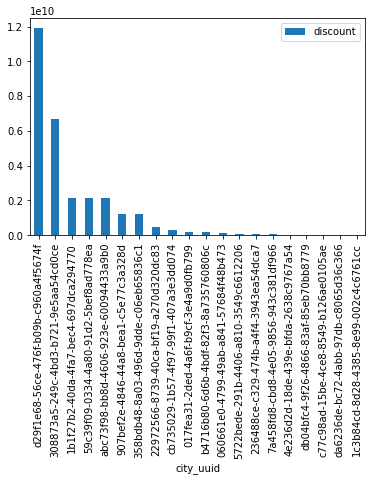

In [88]:
city_dis.head(20).plot(kind='bar')

#### Category with most discount

In [89]:
category_dis = df.groupby(['category_uuid'])['discount'].sum().to_frame()
category_dis.head()

discount
category_uuid                                 
00f9ebd7-76fa-46aa-ba7e-a6eea5bc8f28    220000
0592663e-1848-4280-87b2-0ae0f95355a4  44818950
07efeb2c-bef3-4ef6-af9d-ad9ed6a457b2    150000
0da51c68-41fc-4d3f-9d7c-ed39829ab785    199000
109d7b9c-5f07-423c-8db8-8aa828d6989e   6918000

In [90]:
category_dis.sort_values('discount', inplace = True , ascending=False)
category_dis.head(15)

discount
category_uuid                                    
aa9c2861-90e8-4210-994b-332ecab092fd  28943397359
c017d107-84c1-4586-9cf5-b9858aa5ee89    151244100
67373dce-1a79-48d2-ab18-cc1386d90f70     87985000
c88772c2-d432-4d7c-a5cd-447d0d1d02f4     53077000
0592663e-1848-4280-87b2-0ae0f95355a4     44818950
4c7be4f5-66cd-43fa-833e-92f003cb0b97     29735000
68ba37e5-6495-4dfd-8157-6912aa0bd109     18185000
8284ab7d-f28d-4141-9650-98eb365c1418     18048500
f942d6b1-647a-4aeb-a47c-46eac325a5b5     17904000
91013ae3-edd8-4693-a681-17c7691763c9     12393000
629f8836-8f7f-41e7-8a73-df0e7d623036     11695000
15c18551-6b75-46b1-917f-786cc0e9c268     11409000
eda39d5c-ea37-45f1-99b5-d9c4cfb8b81e     10684000
8ff26775-1571-4a9e-904c-cd7951ba93ea      9936000
b6539b55-21dd-408d-8004-ec75c793cd6c      9300000

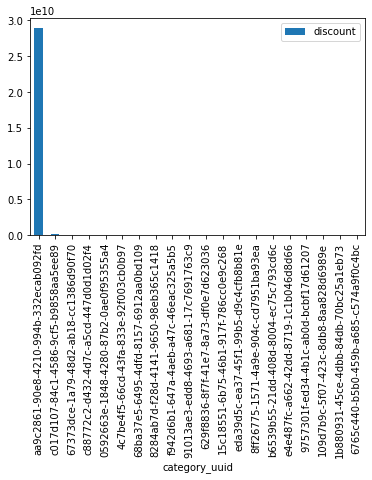

In [91]:
category_dis.head(20).plot(kind='bar')

#### Most Generous users

In [93]:
user_dis = products_df.groupby(['user_uuid'])['discount'].sum().to_frame()
user_dis.head()

discount
user_uuid                                     
00016ef8-b6d3-4f67-8ba3-97146317f212    -50000
0008cf8e-57ec-4981-9c57-7dc6f817d215    320000
0023faeb-5abe-43fd-9c04-8f6701e55dfb    115000
004c68ec-c8e7-4e98-aab6-04fe47332881     20000
0081fc53-45e5-4422-a9bc-c1c9a9d0e0be     27000

In [94]:
user_dis.sort_values('discount', inplace = True , ascending=False)
user_dis.head(15)

discount
user_uuid                                       
0d5f59d7-54db-46e5-866b-96ddf97f69db  6442718941
85ba8dcc-eab6-47fb-a112-0f4fe72ef5a0  6295037294
14b8bbd2-eb47-4138-a262-e8f09b775f33  2150745647
20de7c58-b721-40ea-933b-999f6d396d3a  2148413647
a9502826-05f5-4551-84b7-4ab459715245  2148383647
b9014d2a-f1e2-4f04-9481-5803ba68dd29  2148148647
2106d03c-9c05-4e96-a7b4-8b2bf9258c3a  1238273436
406b882a-7d53-4542-ac73-fb7a60d54f05  1199198411
85139b67-66be-4a37-bd88-2727f09293e8  1015105000
66c89729-68e2-4f4d-9273-3b8db4f2f3ff  1001389000
fda43583-391a-4af0-ad17-954801357d3a   386323147
dc77decd-1be3-49ee-a025-1c64cbb9a654   234276220
05fa2d3d-da96-482c-b8ef-e292f87f4c31   108554566
7cd97c6f-aef2-4bc6-bb98-56b9d4cd026a   104060000
b32c75ca-7234-4e84-82e8-e334a591c348    85648311

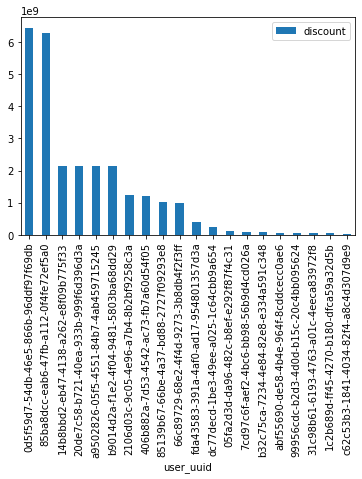

In [95]:
user_dis.head(20).plot(kind='bar')

#### Items with most Comments and Items with most bookmarks (Hot Items)

##### Comments

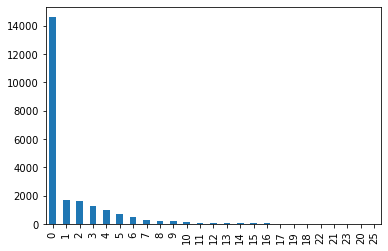

In [102]:
products_df['comments_count'].value_counts().head(25).plot(kind = 'bar')

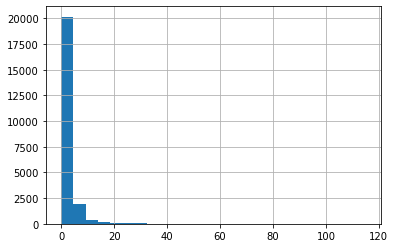

In [112]:
hist = products_df['comments_count'].hist(bins=25)

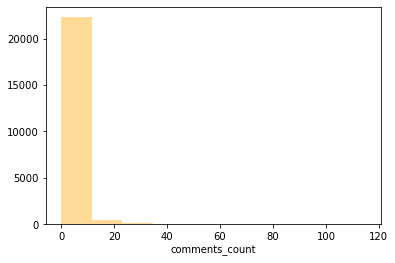

In [34]:
sns.distplot(products_df.comments_count,
             kde=False,
             bins=10,
             color="Orange")

#### bookmarks

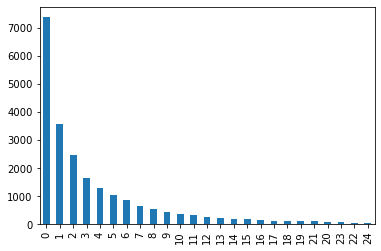

In [114]:
products_df['bookmarks_count'].value_counts().head(25).plot(kind = 'bar')

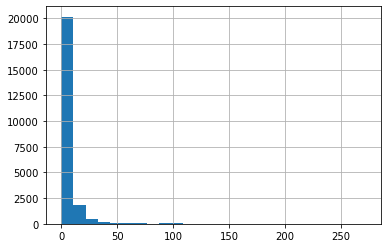

In [115]:
hist = products_df['bookmarks_count'].hist(bins=25)

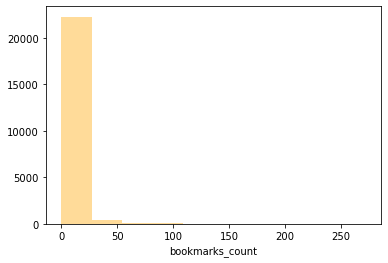

In [35]:
sns.distplot(products_df.bookmarks_count,
             kde=False,
             bins=10,
             color="Orange")

#### Gender Distiribution of the items

In [123]:
products_df.columns

Index(['uuid', 'user_uuid', 'category_uuid', 'city_uuid', 'is_new',
       'is_homemade', 'original_price', 'price', 'comments_count',
       'bookmarks_count', 'gender', 'date', 'bucket', 'bucket_org',
       'discount'],
      dtype='object')

Text(0, 0.5, 'Frequency')

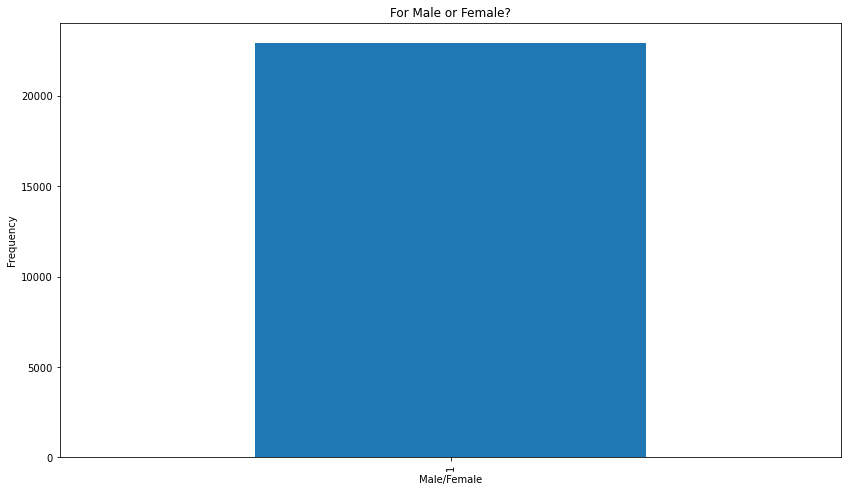

In [125]:
ax = products_df['gender'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="For Male or Female?")
ax.set_xlabel("Male/Female")
ax.set_ylabel("Frequency")

In [126]:
products_df['gender'].value_counts()

1    22893
Name: gender, dtype: int64

Wow! all of the clothes are for men only!

#### Month and Categories

In [130]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22893 entries, 10814 to 12413
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   uuid             22893 non-null  object  
 1   user_uuid        22893 non-null  object  
 2   category_uuid    22893 non-null  object  
 3   city_uuid        22893 non-null  object  
 4   is_new           22893 non-null  int64   
 5   is_homemade      22893 non-null  int64   
 6   original_price   22893 non-null  int64   
 7   price            22893 non-null  int64   
 8   comments_count   22893 non-null  int64   
 9   bookmarks_count  22893 non-null  int64   
 10  gender           22893 non-null  int64   
 11  date             22893 non-null  object  
 12  bucket           22893 non-null  category
 13  bucket_org       22893 non-null  category
 14  discount         22893 non-null  int64   
dtypes: category(2), int64(8), object(5)
memory usage: 11.3+ MB


In [151]:
products_df["date"] = pd.to_datetime(products_df.date, cache=True)

print("Start Of The Period: " , products_df.date.min())
print("End Of The Period  : " , products_df.date.max() )
print("Time Period        : " , products_df.date.max() - products_df.date.min())

Start Of The Period:  2019-12-19 02:42:28
End Of The Period  :  2020-09-16 14:29:20
Time Period        :  272 days 11:46:52


In [131]:
categories_month_count = pd.DataFrame(products_df.groupby([pd.to_datetime(products_df["date"]).dt.to_period('M'), products_df.category_uuid])['category_uuid'].
                                  count())

In [147]:
categories_month_count.rename(columns = {'category_uuid' : 'count'},inplace = True)
categories_month_count

count
date    category_uuid                              
2019-12 0592663e-1848-4280-87b2-0ae0f95355a4    148
        0da51c68-41fc-4d3f-9d7c-ed39829ab785      1
        109d7b9c-5f07-423c-8db8-8aa828d6989e      2
        109e52c9-b8ce-4c24-b693-56a76a361a0d      3
        15c18551-6b75-46b1-917f-786cc0e9c268     80
...                                             ...
2020-09 c2d8bd72-3e93-4db8-8b2f-47825445928d      1
        c54b41e1-4cdc-4851-b2b1-01456646c0e3      7
        d06ba9f8-d3d8-403e-9807-ca9be9122ef7      3
        eda39d5c-ea37-45f1-99b5-d9c4cfb8b81e      1
        ffa7c9df-e9b8-44d8-a0a6-c1cd0de75132      2

[370 rows x 1 columns]

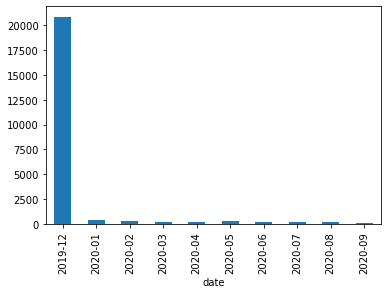

In [150]:
products_df.groupby(pd.to_datetime(products_df["date"]).dt.to_period('M'))['uuid'].count().plot(kind='bar')

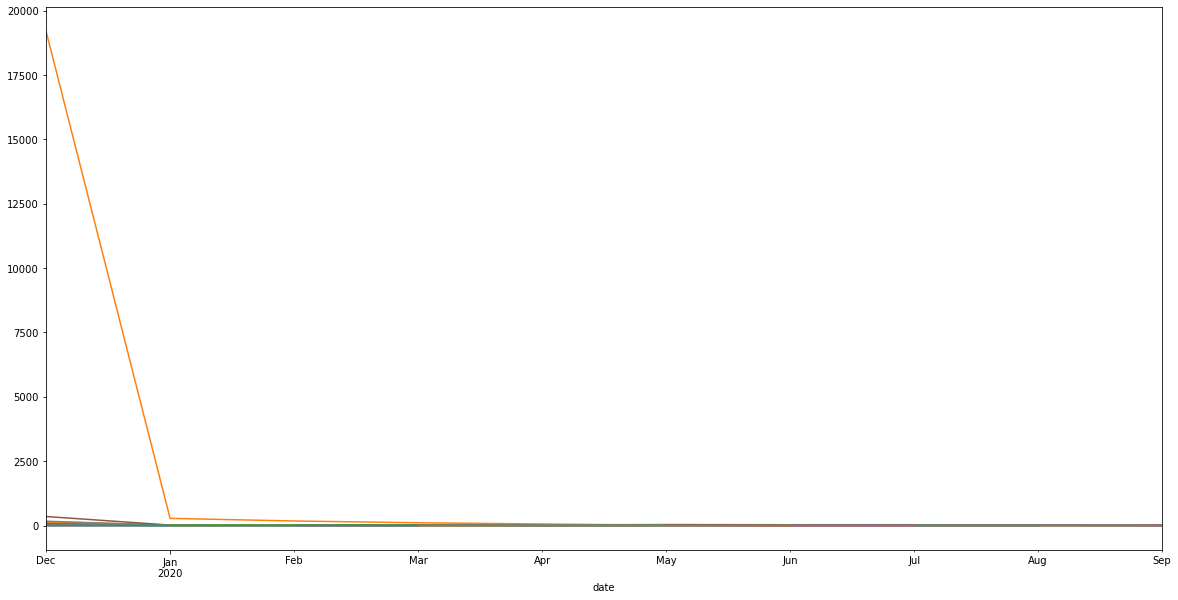

In [136]:
# plot data
fig, ax = plt.subplots(figsize=(20,10))
pd.DataFrame(products_df.groupby([pd.to_datetime(products_df["date"]).dt.to_period('M'), products_df.category_uuid],sort=True)['category_uuid'].
             count()).unstack().plot(ax=ax, legend = False)

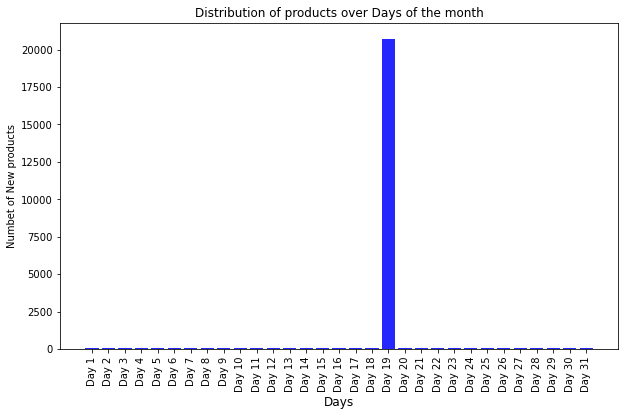

In [153]:
# Daily distribution count
daily_count = products_df.groupby(products_df["date"].dt.day, as_index = False).count()

fig= plt.figure(figsize=(10,6))

# Choose the names of the bars
bars = []
for i in range(1,32):
    bars.append('Day '+str(i))

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, daily_count.date, color = 'Blue', alpha = 0.85)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
plt.yticks()

# Add title and axis names
plt.title('Distribution of products over Days of the month')
plt.xlabel('Days', fontsize='12')
plt.ylabel('Numbet of New products')

 
# Show graphic
plt.savefig('Images/Distribution of new products over days.png',bbox_inches = 'tight')
plt.show()


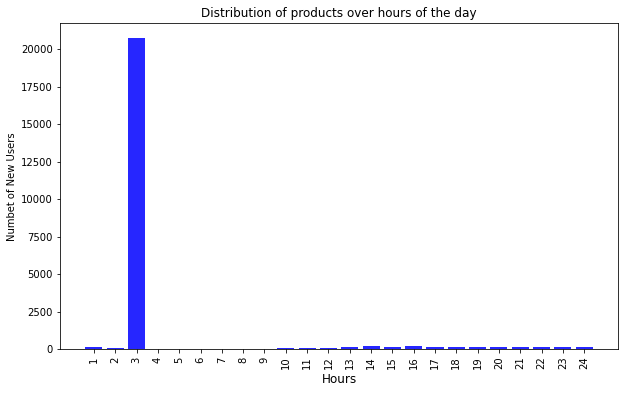

In [154]:
# Monthly distribution count
hourly_count = products_df.groupby(products_df["date"].dt.hour, as_index = False).count()

fig= plt.figure(figsize=(10,6))

# Choose the names of the bars
bars = []
for i in range(1,25):
    bars.append(str(i))

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, hourly_count.date,color = 'Blue', alpha = 0.85)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
plt.yticks()

# Add title and axis names
plt.title('Distribution of products over hours of the day')
plt.xlabel('Hours', fontsize='12')
plt.ylabel('Numbet of New Users')

 
# Show graphic
plt.savefig('Images/Distribution of products over hours.png',bbox_inches = 'tight')
plt.show()

##### Month and Discount

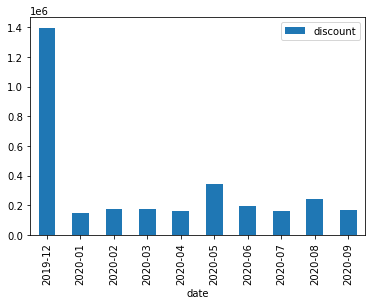

In [176]:
categories_month_count = pd.DataFrame(products_df.groupby(pd.to_datetime(products_df["date"]).dt.to_period('M'))['discount'].mean()).plot(kind = 'bar')

In [180]:
products_df.groupby(pd.to_datetime(products_df["date"]).dt.to_period('M'))['discount'].mean().to_frame()

discount
date                 
2019-12  1.396234e+06
2020-01  1.452440e+05
2020-02  1.725050e+05
2020-03  1.728382e+05
2020-04  1.624104e+05
2020-05  3.443079e+05
2020-06  1.948030e+05
2020-07  1.641512e+05
2020-08  2.442118e+05
2020-09  1.648691e+05

## Purchase DataFrame

#### To Do List
1. Users with Most purchase
2. Seasons with Most Purchase

In [41]:
purchase_df = pd.read_csv('komodaa/purchases.csv')
purchase_df.head()

buyer_uuid                          product_uuid  \
0  372fe527-470c-48a3-a95e-fe32cc4bcc15  99863785-21e9-4ebc-ae7a-8c558d8421b4   
1  970ef8d9-c50e-4821-9687-145379af2b9a  e68a5832-7292-4a54-ad92-02f31a46494c   
2  970ef8d9-c50e-4821-9687-145379af2b9a  ecd1b68f-9db4-49f5-bac5-5679d9f9d784   
3  0bc6742f-d58a-4539-b85b-62bc3463033b  af59299c-2d08-4993-9be0-cfd7e641ae0d   
4  233255de-55b8-4a46-800f-172a58016eec  0cd2b781-bd44-40cf-9422-a50dac21f4b5   

   count                 date  
0      1  2018-02-15 17:38:52  
1      1  2017-02-16 00:47:16  
2      1  2018-03-01 15:10:23  
3      1  2017-12-17 12:49:20  
4      1  2018-03-12 20:26:13

In [184]:
purchase_df['count'].value_counts()

1    184
Name: count, dtype: int64

##### Users with Most purchase

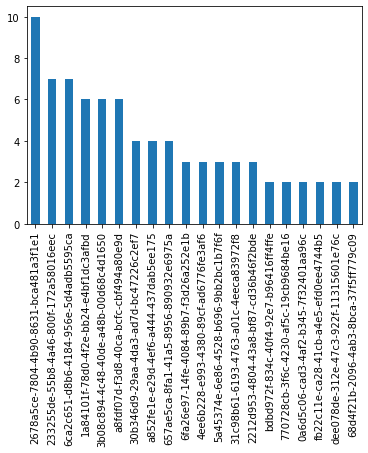

In [185]:
purchase_df.buyer_uuid.value_counts().head(20).plot(kind = 'bar')

##### Time and Purchase

In [188]:
purchase_df["date"] = pd.to_datetime(purchase_df.date, cache=True)

print("Start Of The Period: " , purchase_df.date.min())
print("End Of The Period  : " , purchase_df.date.max() )
print("Time Period        : " , purchase_df.date.max() - purchase_df.date.min())

Start Of The Period:  2017-02-03 14:29:37
End Of The Period  :  2019-11-22 13:52:43
Time Period        :  1021 days 23:23:06


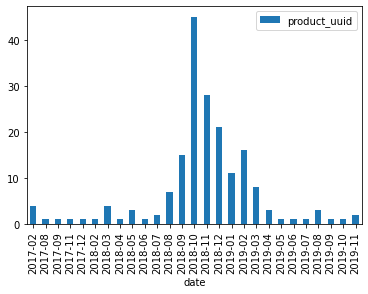

In [187]:
purchase_month_count = pd.DataFrame(purchase_df.groupby(pd.to_datetime(purchase_df["date"]).dt.to_period('M'))['product_uuid'].count()).plot(kind = 'bar')

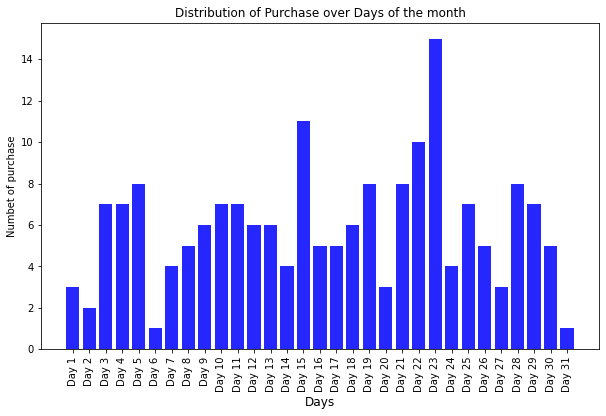

In [189]:
# Daily distribution count
daily_count = purchase_df.groupby(purchase_df["date"].dt.day, as_index = False).count()

fig= plt.figure(figsize=(10,6))

# Choose the names of the bars
bars = []
for i in range(1,32):
    bars.append('Day '+str(i))

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, daily_count.date, color = 'Blue', alpha = 0.85)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
plt.yticks()

# Add title and axis names
plt.title('Distribution of Purchase over Days of the month')
plt.xlabel('Days', fontsize='12')
plt.ylabel('Numbet of purchase')

 
# Show graphic
plt.savefig('Images/Distribution of purchase over days.png',bbox_inches = 'tight')
plt.show()

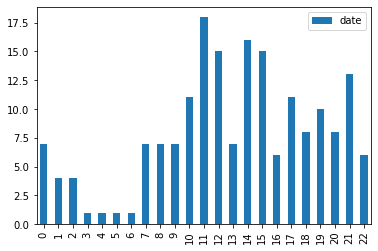

In [195]:
hourly_count = purchase_df.groupby(purchase_df["date"].dt.hour, as_index = False)['date'].count().plot(kind = 'bar')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

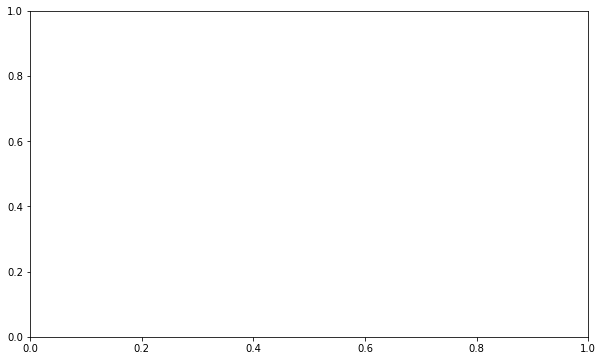

In [191]:
# Monthly distribution count
hourly_count = purchase_df.groupby(purchase_df["date"].dt.hour, as_index = False).count()

fig= plt.figure(figsize=(10,6))

# Choose the names of the bars
bars = []
for i in range(1,25):
    bars.append(str(i))

y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, hourly_count.date, color = 'Blue', alpha = 0.85)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=90)
plt.yticks()

# Add title and axis names
plt.title('Distribution of purchase over hours of the day')
plt.xlabel('Hours', fontsize='12')
plt.ylabel('Numbet of Purchase')

 
# Show graphic
plt.savefig('Images/Distribution of Purchase over hours.png',bbox_inches = 'tight')
plt.show()

## Join tables
1. join User table & Follow table
2. Join Product table & Purchase table
    * season cost average

#### user follow Dataframe

In [30]:
users_df.head(2)

uuid                             city_uuid  \
0  06abe0e5-c408-4a33-9d81-5bfacc891f15  22972566-8739-40ca-bf19-a270d320dc83   
1  33d7f40c-ab30-4517-881c-24d61acc62b8  22972566-8739-40ca-bf19-a270d320dc83   

   gender                 date  
0       1  2017-10-10 00:14:33  
1       1  2017-10-10 00:14:33

In [31]:
users_df.rename(columns = {'uuid': 'userid', 'city_uuid' : 'city_userid', 'gender':'user_gender', 'date' : 'user_date_register' , }, inplace =True)
users_df.head(2)

userid                           city_userid  \
0  06abe0e5-c408-4a33-9d81-5bfacc891f15  22972566-8739-40ca-bf19-a270d320dc83   
1  33d7f40c-ab30-4517-881c-24d61acc62b8  22972566-8739-40ca-bf19-a270d320dc83   

   user_gender   user_date_register  
0            1  2017-10-10 00:14:33  
1            1  2017-10-10 00:14:33

In [9]:
follows_df.head(2)

user_uuid                           follow_uuid  \
0  7effce15-12ba-469c-b4b4-b529425488db  372fe527-470c-48a3-a95e-fe32cc4bcc15   
1  f262a138-9585-4570-9d2d-6815c4d8b6a6  ca28e52f-ad3f-4ad8-8722-4a0fa355cbcd   

                  date  
0  2018-10-05 18:47:56  
1  2020-06-29 14:57:37

In [10]:
follows_df.rename(columns = {'user_uuid': 'userid', 'follow_uuid' : 'follow_userid', 'date' : 'date_follow' }, inplace =True)
follows_df.head(2)

userid                         follow_userid  \
0  7effce15-12ba-469c-b4b4-b529425488db  372fe527-470c-48a3-a95e-fe32cc4bcc15   
1  f262a138-9585-4570-9d2d-6815c4d8b6a6  ca28e52f-ad3f-4ad8-8722-4a0fa355cbcd   

           date_follow  
0  2018-10-05 18:47:56  
1  2020-06-29 14:57:37

In [11]:
user_follow_df = pd.merge(users_df, follows_df, on='userid')
user_follow_df.head()

userid                           city_userid  \
0  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   
1  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   
2  331739cb-6aa3-4689-b002-ff1ba9014532  22972566-8739-40ca-bf19-a270d320dc83   
3  372fe527-470c-48a3-a95e-fe32cc4bcc15  22972566-8739-40ca-bf19-a270d320dc83   
4  2ac6cb5f-c758-43c4-9d77-3b61831998a2  907bef2e-4846-44a8-bea1-c5e77c3a328d   

   user_gender   user_date_register                         follow_userid  \
0            1  2017-10-10 00:14:33  8608a01b-09e9-487f-a1d4-15309222973a   
1            1  2017-10-10 00:14:33  b629b255-1f46-4a92-b6d1-5d67b1ad8c54   
2            1  2017-10-10 00:14:33  233255de-55b8-4a46-800f-172a58016eec   
3            1  2017-10-10 00:14:33  b629b255-1f46-4a92-b6d1-5d67b1ad8c54   
4            1  2017-10-10 00:14:33  1ed79a26-26f7-4ce9-a711-a4fe0ea5e285   

           date_follow  
0  2017-09-19 16:05:31  
1  2017-09-18 23:37:51  
2  2018-07-04 20:01:25  
3  2017-04-02 01:30:04  
4  2019-04-23 00:42:15

In [12]:
user_follow_df.shape

(5886, 6)

In [13]:
user_follow_df.dropna()

userid  \
0     634edd5c-318e-40ec-aeb9-1e863836754d   
1     634edd5c-318e-40ec-aeb9-1e863836754d   
2     331739cb-6aa3-4689-b002-ff1ba9014532   
3     372fe527-470c-48a3-a95e-fe32cc4bcc15   
4     2ac6cb5f-c758-43c4-9d77-3b61831998a2   
...                                    ...   
5881  a8ebeeaa-456d-4c52-87b6-af933bb0f996   
5882  a8ebeeaa-456d-4c52-87b6-af933bb0f996   
5883  824abc12-e8d1-478b-94bf-576ba68a6159   
5884  f5602717-0ece-475a-ab77-c5c0e822ff53   
5885  f5602717-0ece-475a-ab77-c5c0e822ff53   

                               city_userid  user_gender   user_date_register  \
0     22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33   
1     22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33   
2     22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33   
3     22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33   
4     907bef2e-4846-44a8-bea1-c5e77c3a328d            1  2017-10-10 00:14:33   
...                                    ...          ...                  ...   
5881  da6236de-bc72-4abb-97db-c8065d36c366            1  2018-10-31 18:26:10   
5882  da6236de-bc72-4abb-97db-c8065d36c366            1  2018-10-31 18:26:10   
5883  49233767-888b-43fc-8441-9698f45417f6            1  2018-10-31 19:18:43   
5884  308873a5-249c-4bd3-b721-9e5aa54cd0ce            1  2018-10-31 19:43:47   
5885  308873a5-249c-4bd3-b721-9e5aa54cd0ce            1  2018-10-31 19:43:47   

                             follow_userid          date_follow  
0     8608a01b-09e9-487f-a1d4-15309222973a  2017-09-19 16:05:31  
1     b629b255-1f46-4a92-b6d1-5d67b1ad8c54  2017-09-18 23:37:51  
2     233255de-55b8-4a46-800f-172a58016eec  2018-07-04 20:01:25  
3     b629b255-1f46-4a92-b6d1-5d67b1ad8c54  2017-04-02 01:30:04  
4     1ed79a26-26f7-4ce9-a711-a4fe0ea5e285  2019-04-23 00:42:15  
...                                    ...                  ...  
5881  d98c1170-5f2a-446d-aa26-5beef1f054cf  2018-11-07 10:32:06  
5882  17fc2fcd-55d4-4342-a553-302e56d6d816  2018-10-31 18:50:33  
5883  e5b4f882-7dca-4e63-a665-f412cb383e39  2018-11-24 18:22:32  
5884  114a3247-5226-460f-850f-3d53ad112ed1  2019-08-28 23:50:50  
5885  28eeb457-8e0c-467e-a471-f72b065fc285  2019-09-01 16:17:18  

[5886 rows x 6 columns]

In [14]:
# Chech for Null Value
missing_percentage = user_follow_df.isnull().sum() / user_follow_df.shape[0] * 100
missing_percentage

userid                0.0
city_userid           0.0
user_gender           0.0
user_date_register    0.0
follow_userid         0.0
date_follow           0.0
dtype: float64

In [15]:
user_follow_df.head(2)

userid                           city_userid  \
0  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   
1  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   

   user_gender   user_date_register                         follow_userid  \
0            1  2017-10-10 00:14:33  8608a01b-09e9-487f-a1d4-15309222973a   
1            1  2017-10-10 00:14:33  b629b255-1f46-4a92-b6d1-5d67b1ad8c54   

           date_follow  
0  2017-09-19 16:05:31  
1  2017-09-18 23:37:51

In [23]:
# All the users in this dataset are male so we drop user_gender column in order to make our data more readable
user_follow_df.drop(columns= 'user_gender', inplace =True )

#### more Socialable cities

In [ ]:
# user_follow_df.groupby(pd.to_datetime(products_df["date"]).dt.to_period('M'))['uuid'].count().plot(kind='bar')

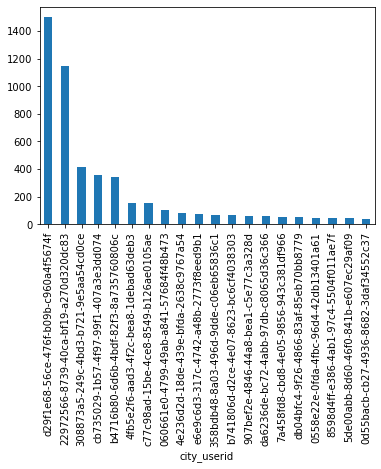

In [21]:
user_follow_df.groupby('city_userid')['userid'].count().nlargest(20).plot(kind='bar')

#### Time between registeration and first follow

In [24]:
user_follow_df.head(2)

userid                           city_userid  \
0  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   
1  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   

    user_date_register                         follow_userid  \
0  2017-10-10 00:14:33  8608a01b-09e9-487f-a1d4-15309222973a   
1  2017-10-10 00:14:33  b629b255-1f46-4a92-b6d1-5d67b1ad8c54   

           date_follow  
0  2017-09-19 16:05:31  
1  2017-09-18 23:37:51

In [25]:
user_follow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5886 entries, 0 to 5885
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              5886 non-null   object
 1   city_userid         5886 non-null   object
 2   user_date_register  5886 non-null   object
 3   follow_userid       5886 non-null   object
 4   date_follow         5886 non-null   object
dtypes: object(5)
memory usage: 275.9+ KB


In [26]:
user_follow_df['time_dif'] = pd.to_datetime(user_follow_df['date_follow']) - pd.to_datetime(user_follow_df['user_date_register'])
user_follow_df.head()

userid                           city_userid  \
0  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   
1  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   
2  331739cb-6aa3-4689-b002-ff1ba9014532  22972566-8739-40ca-bf19-a270d320dc83   
3  372fe527-470c-48a3-a95e-fe32cc4bcc15  22972566-8739-40ca-bf19-a270d320dc83   
4  2ac6cb5f-c758-43c4-9d77-3b61831998a2  907bef2e-4846-44a8-bea1-c5e77c3a328d   

    user_date_register                         follow_userid  \
0  2017-10-10 00:14:33  8608a01b-09e9-487f-a1d4-15309222973a   
1  2017-10-10 00:14:33  b629b255-1f46-4a92-b6d1-5d67b1ad8c54   
2  2017-10-10 00:14:33  233255de-55b8-4a46-800f-172a58016eec   
3  2017-10-10 00:14:33  b629b255-1f46-4a92-b6d1-5d67b1ad8c54   
4  2017-10-10 00:14:33  1ed79a26-26f7-4ce9-a711-a4fe0ea5e285   

           date_follow            time_dif  
0  2017-09-19 16:05:31  -21 days +15:50:58  
1  2017-09-18 23:37:51  -22 days +23:23:18  
2  2018-07-04 20:01:25   267 days 19:46:52  
3  2017-04-02 01:30:04 -191 days +01:15:31  
4  2019-04-23 00:42:15   560 days 00:27:42

In [ ]:
# It seems that our data has some problem with regards to time!
# let's double check to be sure!


In [33]:
users_df[users_df['userid'] == '634edd5c-318e-40ec-aeb9-1e863836754d']

userid                           city_userid  \
4  634edd5c-318e-40ec-aeb9-1e863836754d  22972566-8739-40ca-bf19-a270d320dc83   

   user_gender   user_date_register  
4            1  2017-10-10 00:14:33

In [35]:
follows_df[follows_df['userid'] == '634edd5c-318e-40ec-aeb9-1e863836754d']

userid  \
324  634edd5c-318e-40ec-aeb9-1e863836754d   
416  634edd5c-318e-40ec-aeb9-1e863836754d   

                            follow_userid          date_follow  
324  8608a01b-09e9-487f-a1d4-15309222973a  2017-09-19 16:05:31  
416  b629b255-1f46-4a92-b6d1-5d67b1ad8c54  2017-09-18 23:37:51

The user with **634edd5c-318e-40ec-aeb9-1e863836754d** regiester on **2017-10-10 00:14:33** and follow two other user on **2017-09-19 16:05:3** and **2017-09-18 23:37:51**, which is impossible!

#### product_purchase Dataframe

In [36]:
products_df.head(2)

uuid                             user_uuid  \
0  33949611-a3e4-440a-83b1-6cc1a2602b8b  06abe0e5-c408-4a33-9d81-5bfacc891f15   
1  a55fbc5e-b0b1-43c8-b25b-57685d2ee242  16848d64-b555-4182-a5b4-c0ae1e850e01   

                          category_uuid                             city_uuid  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   15000               0   
1       1            0          550000  300000               0   

   bookmarks_count  gender                 date  
0                0       1  2019-12-19 02:42:28  
1                1       1  2019-12-19 02:42:28

In [42]:
products_df.rename(columns = {'uuid': 'productid', 'user_uuid' : 'userid', 'city_uuid': 'city_product_id', 'gender':'product_gender', 'date' : 'product_date_register' , }, inplace =True)
products_df.head(2)

productid                                userid  \
0  33949611-a3e4-440a-83b1-6cc1a2602b8b  06abe0e5-c408-4a33-9d81-5bfacc891f15   
1  a55fbc5e-b0b1-43c8-b25b-57685d2ee242  16848d64-b555-4182-a5b4-c0ae1e850e01   

                          category_uuid                       city_product_id  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   15000               0   
1       1            0          550000  300000               0   

   bookmarks_count  product_gender product_date_register  
0                0               1   2019-12-19 02:42:28  
1                1               1   2019-12-19 02:42:28

In [43]:
purchase_df.head(2)

buyer_uuid                          product_uuid  \
0  372fe527-470c-48a3-a95e-fe32cc4bcc15  99863785-21e9-4ebc-ae7a-8c558d8421b4   
1  970ef8d9-c50e-4821-9687-145379af2b9a  e68a5832-7292-4a54-ad92-02f31a46494c   

   count                 date  
0      1  2018-02-15 17:38:52  
1      1  2017-02-16 00:47:16

In [44]:
purchase_df.rename(columns = {'product_uuid': 'productid', 'date' : 'date_purchase' }, inplace =True)
purchase_df.head(2)

buyer_uuid                             productid  \
0  372fe527-470c-48a3-a95e-fe32cc4bcc15  99863785-21e9-4ebc-ae7a-8c558d8421b4   
1  970ef8d9-c50e-4821-9687-145379af2b9a  e68a5832-7292-4a54-ad92-02f31a46494c   

   count        date_purchase  
0      1  2018-02-15 17:38:52  
1      1  2017-02-16 00:47:16

In [45]:
product_purchase_df = pd.merge(products_df, purchase_df, on='productid')
product_purchase_df.head(2)

productid                                userid  \
0  0cd2b781-bd44-40cf-9422-a50dac21f4b5  498439f1-52ed-4e3d-b07a-fe77061837b5   
1  3aa1db5b-edf8-4cc0-bd8e-0d22d03159b3  8f237e9d-52c7-4ec8-ae23-6898070ba539   
2  a5236845-e87d-4026-815c-4739e25eeff9  fd0bc220-3e6c-48ef-a80f-0f9ec19017b6   
3  87e3ebf0-ef3a-45dc-9163-e79868af3df5  fae08429-b712-4fbc-811c-cce5a2c02809   
4  99863785-21e9-4ebc-ae7a-8c558d8421b4  233255de-55b8-4a46-800f-172a58016eec   

                          category_uuid                       city_product_id  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
2  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
3  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
4  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   35000               0   
1       1            0          250000  100000               0   
2       0            0               0   30000               0   
3       0            0           80000   25000               0   
4       1            0               0   12000               0   

   bookmarks_count  product_gender product_date_register  \
0                0               1   2019-12-19 02:42:28   
1                8               1   2019-12-19 02:42:28   
2                1               1   2019-12-19 02:42:28   
3                8               1   2019-12-19 02:42:28   
4                1               1   2019-12-19 02:42:28   

                             buyer_uuid  count        date_purchase  
0  233255de-55b8-4a46-800f-172a58016eec      1  2018-03-12 20:26:13  
1  bc572d73-84f0-4f94-9c9c-7adc82875a4e      1  2019-10-22 15:12:04  
2  446cd44f-8065-4464-a4ff-74b8cf97fb00      1  2017-02-03 14:29:37  
3  263147b5-ecdd-4a3a-9953-2336929deb11      1  2018-10-12 19:27:21  
4  372fe527-470c-48a3-a95e-fe32cc4bcc15      1  2018-02-15 17:38:52

In [47]:
product_purchase_df.shape

(184, 15)

In [48]:
product_purchase_df.dropna()

productid  \
0    0cd2b781-bd44-40cf-9422-a50dac21f4b5   
1    3aa1db5b-edf8-4cc0-bd8e-0d22d03159b3   
2    a5236845-e87d-4026-815c-4739e25eeff9   
3    87e3ebf0-ef3a-45dc-9163-e79868af3df5   
4    99863785-21e9-4ebc-ae7a-8c558d8421b4   
..                                    ...   
179  743a44a4-554c-4b3d-9dc0-13e4f0d6f1fb   
180  9dfe5915-f8a1-4287-aea6-528adc32fb9d   
181  f7a1ab98-48be-453d-b4e9-36209140c6fe   
182  959cb200-33a0-47cc-85ad-421e80a05d5e   
183  2e20eb4b-28ab-497e-9de9-bc8e3800459b   

                                   userid  \
0    498439f1-52ed-4e3d-b07a-fe77061837b5   
1    8f237e9d-52c7-4ec8-ae23-6898070ba539   
2    fd0bc220-3e6c-48ef-a80f-0f9ec19017b6   
3    fae08429-b712-4fbc-811c-cce5a2c02809   
4    233255de-55b8-4a46-800f-172a58016eec   
..                                    ...   
179  abf55690-de58-4b4e-964f-8cddcecc0ae6   
180  cf9af3d9-5d9f-4fd6-b4ba-05877db5c236   
181  cf9af3d9-5d9f-4fd6-b4ba-05877db5c236   
182  cf9af3d9-5d9f-4fd6-b4ba-05877db5c236   
183  5a660386-e8d4-449c-b7ea-b2a7441b122e   

                            category_uuid  \
0    aa9c2861-90e8-4210-994b-332ecab092fd   
1    aa9c2861-90e8-4210-994b-332ecab092fd   
2    aa9c2861-90e8-4210-994b-332ecab092fd   
3    aa9c2861-90e8-4210-994b-332ecab092fd   
4    aa9c2861-90e8-4210-994b-332ecab092fd   
..                                    ...   
179  aa9c2861-90e8-4210-994b-332ecab092fd   
180  aa9c2861-90e8-4210-994b-332ecab092fd   
181  aa9c2861-90e8-4210-994b-332ecab092fd   
182  aa9c2861-90e8-4210-994b-332ecab092fd   
183  aa9c2861-90e8-4210-994b-332ecab092fd   

                          city_product_id  is_new  is_homemade  \
0    22972566-8739-40ca-bf19-a270d320dc83       0            0   
1    22972566-8739-40ca-bf19-a270d320dc83       1            0   
2    22972566-8739-40ca-bf19-a270d320dc83       0            0   
3    22972566-8739-40ca-bf19-a270d320dc83       0            0   
4    22972566-8739-40ca-bf19-a270d320dc83       1            0   
..                                    ...     ...          ...   
179  5722bede-291b-4406-a810-3549c6612206       0            0   
180  821a043c-a8c3-45f1-8a18-d12fa7e2f34b       0            0   
181  821a043c-a8c3-45f1-8a18-d12fa7e2f34b       1            0   
182  821a043c-a8c3-45f1-8a18-d12fa7e2f34b       1            0   
183  6b164dd0-56e1-4481-9f2b-348a06c583a6       0            0   

     original_price   price  comments_count  bookmarks_count  product_gender  \
0                 0   35000               0                0               1   
1            250000  100000               0                8               1   
2                 0   30000               0                1               1   
3             80000   25000               0                8               1   
4                 0   12000               0                1               1   
..              ...     ...             ...              ...             ...   
179          250000   98000               0               17               1   
180           45000   10000               0                7               1   
181           85000   10000               0                7               1   
182           95000   27000               0               10               1   
183          120000   50000               0                1               1   

    product_date_register                            buyer_uuid  count  \
0     2019-12-19 02:42:28  233255de-55b8-4a46-800f-172a58016eec      1   
1     2019-12-19 02:42:28  bc572d73-84f0-4f94-9c9c-7adc82875a4e      1   
2     2019-12-19 02:42:28  446cd44f-8065-4464-a4ff-74b8cf97fb00      1   
3     2019-12-19 02:42:28  263147b5-ecdd-4a3a-9953-2336929deb11      1   
4     2019-12-19 02:42:28  372fe527-470c-48a3-a95e-fe32cc4bcc15      1   
..                    ...                                   ...    ...   
179   2019-12-19 02:42:28  c82ae641-c46d-45b8-8655-b31cc4710cbc      1   
180   2019-12-19 02:42:28  6fa26e97-14fe-4084-89b7-f3d26a252e1b

In [49]:
# Chech for Null Value
missing_percentage = product_purchase_df.isnull().sum() / product_purchase_df.shape[0] * 100
missing_percentage

productid                0.0
userid                   0.0
category_uuid            0.0
city_product_id          0.0
is_new                   0.0
is_homemade              0.0
original_price           0.0
price                    0.0
comments_count           0.0
bookmarks_count          0.0
product_gender           0.0
product_date_register    0.0
buyer_uuid               0.0
count                    0.0
date_purchase            0.0
dtype: float64

In [50]:
product_purchase_df.head(2)

productid                                userid  \
0  0cd2b781-bd44-40cf-9422-a50dac21f4b5  498439f1-52ed-4e3d-b07a-fe77061837b5   
1  3aa1db5b-edf8-4cc0-bd8e-0d22d03159b3  8f237e9d-52c7-4ec8-ae23-6898070ba539   

                          category_uuid                       city_product_id  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   35000               0   
1       1            0          250000  100000               0   

   bookmarks_count  product_gender product_date_register  \
0                0               1   2019-12-19 02:42:28   
1                8               1   2019-12-19 02:42:28   

                             buyer_uuid  count        date_purchase  
0  233255de-55b8-4a46-800f-172a58016eec      1  2018-03-12 20:26:13  
1  bc572d73-84f0-4f94-9c9c-7adc82875a4e      1  2019-10-22 15:12:04

#### category with most purchase

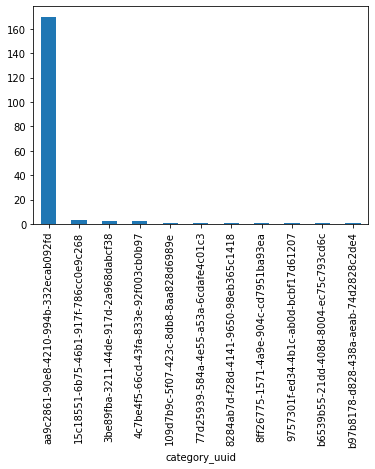

In [52]:
product_purchase_df.groupby('category_uuid')['category_uuid'].count().nlargest(20).plot(kind='bar')

#### cities with most successful sales!

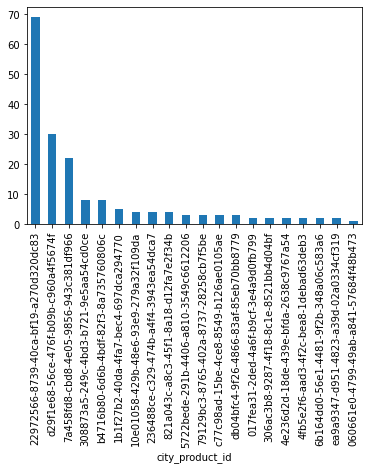

In [53]:
product_purchase_df.groupby('city_product_id')['city_product_id'].count().nlargest(20).plot(kind='bar')

#### Which one sales better? New or Old?

Text(0, 0.5, 'Frequency')

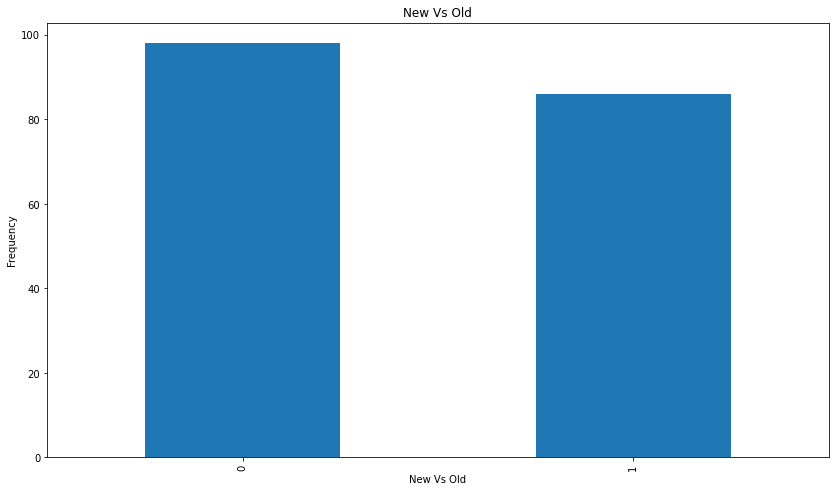

In [55]:
ax = product_purchase_df['is_new'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="New Vs Old")
ax.set_xlabel("New Vs Old")
ax.set_ylabel("Frequency")

#### Which one sales better? homemade or Manufactured?

Text(0, 0.5, 'Frequency')

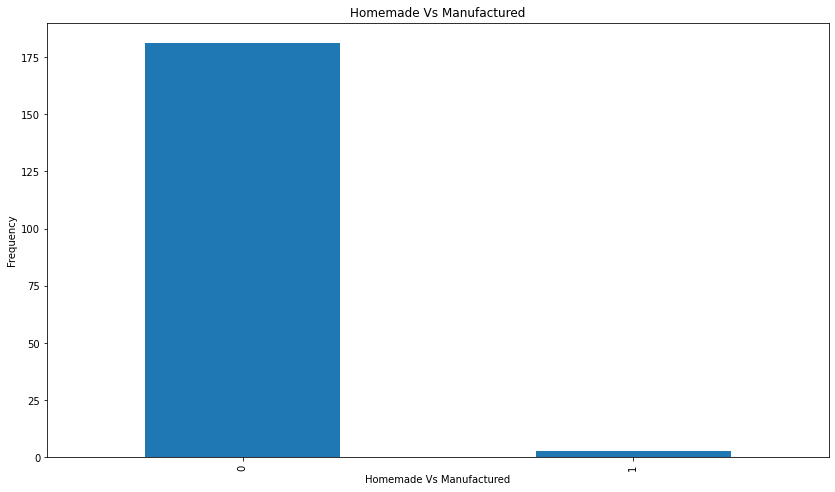

In [56]:
ax = product_purchase_df['is_homemade'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Homemade Vs Manufactured")
ax.set_xlabel("Homemade Vs Manufactured")
ax.set_ylabel("Frequency")

#### How long does it take to sale a product on average?

In [57]:
product_purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   productid              184 non-null    object
 1   userid                 184 non-null    object
 2   category_uuid          184 non-null    object
 3   city_product_id        184 non-null    object
 4   is_new                 184 non-null    int64 
 5   is_homemade            184 non-null    int64 
 6   original_price         184 non-null    int64 
 7   price                  184 non-null    int64 
 8   comments_count         184 non-null    int64 
 9   bookmarks_count        184 non-null    int64 
 10  product_gender         184 non-null    int64 
 11  product_date_register  184 non-null    object
 12  buyer_uuid             184 non-null    object
 13  count                  184 non-null    int64 
 14  date_purchase          184 non-null    object
dtypes: int64(8), object(7)


In [58]:
product_purchase_df['time_dif'] = pd.to_datetime(product_purchase_df['date_purchase']) - pd.to_datetime(product_purchase_df['product_date_register'])
product_purchase_df.head()

productid                                userid  \
0  0cd2b781-bd44-40cf-9422-a50dac21f4b5  498439f1-52ed-4e3d-b07a-fe77061837b5   
1  3aa1db5b-edf8-4cc0-bd8e-0d22d03159b3  8f237e9d-52c7-4ec8-ae23-6898070ba539   
2  a5236845-e87d-4026-815c-4739e25eeff9  fd0bc220-3e6c-48ef-a80f-0f9ec19017b6   
3  87e3ebf0-ef3a-45dc-9163-e79868af3df5  fae08429-b712-4fbc-811c-cce5a2c02809   
4  99863785-21e9-4ebc-ae7a-8c558d8421b4  233255de-55b8-4a46-800f-172a58016eec   

                          category_uuid                       city_product_id  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
2  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
3  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
4  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   35000               0   
1       1            0          250000  100000               0   
2       0            0               0   30000               0   
3       0            0           80000   25000               0   
4       1            0               0   12000               0   

   bookmarks_count  product_gender product_date_register  \
0                0               1   2019-12-19 02:42:28   
1                8               1   2019-12-19 02:42:28   
2                1               1   2019-12-19 02:42:28   
3                8               1   2019-12-19 02:42:28   
4                1               1   2019-12-19 02:42:28   

                             buyer_uuid  count        date_purchase  \
0  233255de-55b8-4a46-800f-172a58016eec      1  2018-03-12 20:26:13   
1  bc572d73-84f0-4f94-9c9c-7adc82875a4e      1  2019-10-22 15:12:04   
2  446cd44f-8065-4464-a4ff-74b8cf97fb00      1  2017-02-03 14:29:37   
3  263147b5-ecdd-4a3a-9953-2336929deb11      1  2018-10-12 19:27:21   
4  372fe527-470c-48a3-a95e-fe32cc4bcc15      1  2018-02-15 17:38:52   

              time_dif  
0  -647 days +17:43:45  
1   -58 days +12:29:36  
2 -1049 days +11:47:09  
3  -433 days +16:44:53  
4  -672 days +14:56:24

It seems that we have the same problem here with this table too!
let's double check to make sure!

In [60]:
products_df.head(2)

productid                                userid  \
0  33949611-a3e4-440a-83b1-6cc1a2602b8b  06abe0e5-c408-4a33-9d81-5bfacc891f15   
1  a55fbc5e-b0b1-43c8-b25b-57685d2ee242  16848d64-b555-4182-a5b4-c0ae1e850e01   

                          category_uuid                       city_product_id  \
0  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   
1  aa9c2861-90e8-4210-994b-332ecab092fd  22972566-8739-40ca-bf19-a270d320dc83   

   is_new  is_homemade  original_price   price  comments_count  \
0       0            0               0   15000               0   
1       1            0          550000  300000               0   

   bookmarks_count  product_gender product_date_register  
0                0               1   2019-12-19 02:42:28  
1                1               1   2019-12-19 02:42:28

In [61]:
products_df[products_df['productid'] == '0cd2b781-bd44-40cf-9422-a50dac21f4b5']

productid  \
44  0cd2b781-bd44-40cf-9422-a50dac21f4b5   

                                  userid  \
44  498439f1-52ed-4e3d-b07a-fe77061837b5   

                           category_uuid  \
44  aa9c2861-90e8-4210-994b-332ecab092fd   

                         city_product_id  is_new  is_homemade  original_price  \
44  22972566-8739-40ca-bf19-a270d320dc83       0            0               0   

    price  comments_count  bookmarks_count  product_gender  \
44  35000               0                0               1   

   product_date_register  
44   2019-12-19 02:42:28

In [62]:
purchase_df[purchase_df['productid'] == '0cd2b781-bd44-40cf-9422-a50dac21f4b5']

buyer_uuid                             productid  \
4  233255de-55b8-4a46-800f-172a58016eec  0cd2b781-bd44-40cf-9422-a50dac21f4b5   

   count        date_purchase  
4      1  2018-03-12 20:26:13

The product with **0cd2b781-bd44-40cf-9422-a50dac21f4b5** regiester on **2019-12-19 02:42:28** and sold on **2018-03-12 20:26:13**, which is impossible!

#### user_purchase Dataframe

In [63]:
users_df.head(2)

userid                           city_userid  \
0  06abe0e5-c408-4a33-9d81-5bfacc891f15  22972566-8739-40ca-bf19-a270d320dc83   
1  33d7f40c-ab30-4517-881c-24d61acc62b8  22972566-8739-40ca-bf19-a270d320dc83   

   user_gender   user_date_register  
0            1  2017-10-10 00:14:33  
1            1  2017-10-10 00:14:33

In [64]:
purchase_df.head(2)

buyer_uuid                             productid  \
0  372fe527-470c-48a3-a95e-fe32cc4bcc15  99863785-21e9-4ebc-ae7a-8c558d8421b4   
1  970ef8d9-c50e-4821-9687-145379af2b9a  e68a5832-7292-4a54-ad92-02f31a46494c   

   count        date_purchase  
0      1  2018-02-15 17:38:52  
1      1  2017-02-16 00:47:16

In [67]:
purchase_df.rename(columns = {'buyer_uuid': 'userid'}, inplace = True)
purchase_df.head(2)

userid                             productid  \
0  372fe527-470c-48a3-a95e-fe32cc4bcc15  99863785-21e9-4ebc-ae7a-8c558d8421b4   
1  970ef8d9-c50e-4821-9687-145379af2b9a  e68a5832-7292-4a54-ad92-02f31a46494c   

   count        date_purchase  
0      1  2018-02-15 17:38:52  
1      1  2017-02-16 00:47:16

In [68]:
user_purchase_df = pd.merge(users_df, purchase_df, on='userid')
user_purchase_df.head()

userid                           city_userid  \
0  372fe527-470c-48a3-a95e-fe32cc4bcc15  22972566-8739-40ca-bf19-a270d320dc83   
1  970ef8d9-c50e-4821-9687-145379af2b9a  22972566-8739-40ca-bf19-a270d320dc83   
2  970ef8d9-c50e-4821-9687-145379af2b9a  22972566-8739-40ca-bf19-a270d320dc83   
3  0bc6742f-d58a-4539-b85b-62bc3463033b  22972566-8739-40ca-bf19-a270d320dc83   
4  233255de-55b8-4a46-800f-172a58016eec  22972566-8739-40ca-bf19-a270d320dc83   

   user_gender   user_date_register                             productid  \
0            1  2017-10-10 00:14:33  99863785-21e9-4ebc-ae7a-8c558d8421b4   
1            1  2017-10-10 00:14:33  e68a5832-7292-4a54-ad92-02f31a46494c   
2            1  2017-10-10 00:14:33  ecd1b68f-9db4-49f5-bac5-5679d9f9d784   
3            1  2017-10-10 00:14:33  af59299c-2d08-4993-9be0-cfd7e641ae0d   
4            1  2017-10-10 00:14:33  0cd2b781-bd44-40cf-9422-a50dac21f4b5   

   count        date_purchase  
0      1  2018-02-15 17:38:52  
1      1  2017-02-16 00:47:16  
2      1  2018-03-01 15:10:23  
3      1  2017-12-17 12:49:20  
4      1  2018-03-12 20:26:13

In [69]:
user_purchase_df.shape

(184, 7)

In [71]:
user_purchase_df.dropna()

userid  \
0    372fe527-470c-48a3-a95e-fe32cc4bcc15   
1    970ef8d9-c50e-4821-9687-145379af2b9a   
2    970ef8d9-c50e-4821-9687-145379af2b9a   
3    0bc6742f-d58a-4539-b85b-62bc3463033b   
4    233255de-55b8-4a46-800f-172a58016eec   
..                                    ...   
179  af9048ee-3109-483c-b710-ed0fd8dbe41c   
180  8abf1063-e8d4-4630-83e0-b139cfebb37f   
181  e5789a70-db24-483e-8d3f-85002011d954   
182  61c3b4b1-e33a-47d6-b62a-3dd2c78e4497   
183  a85d3645-000b-4a62-a8e3-4e5b7574c934   

                              city_userid  user_gender   user_date_register  \
0    22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33   
1    22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33   
2    22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33   
3    22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33   
4    22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33   
..                                    ...          ...                  ...   
179  cb735029-1b57-4f97-99f1-407a3e3dd074            1  2018-10-25 12:18:46   
180  060661e0-4799-49ab-a841-57684f48b473            1  2018-10-25 18:41:59   
181  a200397b-66c5-4161-8280-cc2bcafedfed            1  2018-10-28 09:48:01   
182  7a458fd8-cbd8-4e05-9856-943c381df966            1  2018-10-28 18:13:39   
183  cb735029-1b57-4f97-99f1-407a3e3dd074            1  2018-10-30 15:14:20   

                                productid  count        date_purchase  
0    99863785-21e9-4ebc-ae7a-8c558d8421b4      1  2018-02-15 17:38:52  
1    e68a5832-7292-4a54-ad92-02f31a46494c      1  2017-02-16 00:47:16  
2    ecd1b68f-9db4-49f5-bac5-5679d9f9d784      1  2018-03-01 15:10:23  
3    af59299c-2d08-4993-9be0-cfd7e641ae0d      1  2017-12-17 12:49:20  
4    0cd2b781-bd44-40cf-9422-a50dac21f4b5      1  2018-03-12 20:26:13  
..                                    ...    ...                  ...  
179  d6d66059-e6a5-4309-a864-e0076d0d934e      1  2018-10-29 12:17:37  
180  7b9fb23f-8598-4752-8c0c-352e568769a5      1  2018-11-23 14:01:24  
181  290cf9b3-a7ad-4820-85c9-7493e32256e2      1  2018-11-14 22:49:40  
182  8cd5bef7-9c1f-4d47-ad90-b350356f0883      1  2018-12-07 20:06:18  
183  f24cd7cc-3154-41e5-92ec-76eebea2afdb      1  2019-09-11 22:20:45  

[184 rows x 7 columns]

In [72]:
# Chech for Null Value
missing_percentage = user_purchase_df.isnull().sum() / user_purchase_df.shape[0] * 100
missing_percentage

userid                0.0
city_userid           0.0
user_gender           0.0
user_date_register    0.0
productid             0.0
count                 0.0
date_purchase         0.0
dtype: float64

#### Users with most purchases

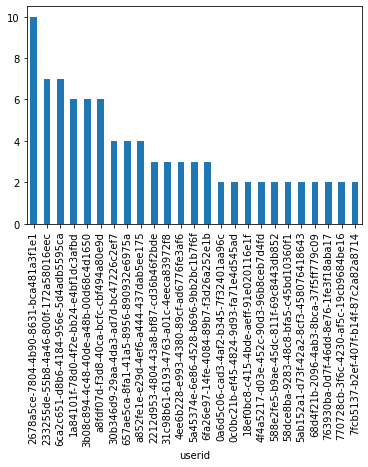

In [75]:
user_purchase_df.groupby('userid')['userid'].count().nlargest(25).plot(kind='bar')

#### cities with most purchases

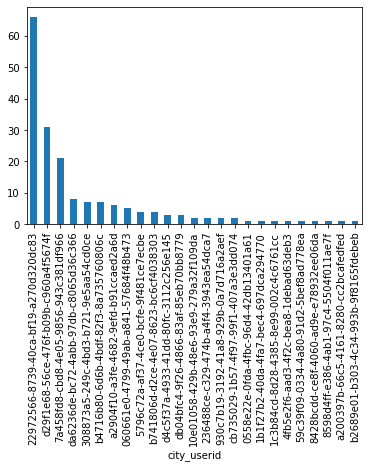

In [76]:
user_purchase_df.groupby('city_userid')['city_userid'].count().nlargest(25).plot(kind='bar')

#### Time between registeration and first purchase

In [79]:
user_purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   userid              184 non-null    object
 1   city_userid         184 non-null    object
 2   user_gender         184 non-null    int64 
 3   user_date_register  184 non-null    object
 4   productid           184 non-null    object
 5   count               184 non-null    int64 
 6   date_purchase       184 non-null    object
dtypes: int64(2), object(5)
memory usage: 11.5+ KB


In [80]:
user_purchase_df['time_dif'] = pd.to_datetime(user_purchase_df['date_purchase']) - pd.to_datetime(user_purchase_df['user_date_register'])
user_purchase_df.head()

userid                           city_userid  \
0  372fe527-470c-48a3-a95e-fe32cc4bcc15  22972566-8739-40ca-bf19-a270d320dc83   
1  970ef8d9-c50e-4821-9687-145379af2b9a  22972566-8739-40ca-bf19-a270d320dc83   
2  970ef8d9-c50e-4821-9687-145379af2b9a  22972566-8739-40ca-bf19-a270d320dc83   
3  0bc6742f-d58a-4539-b85b-62bc3463033b  22972566-8739-40ca-bf19-a270d320dc83   
4  233255de-55b8-4a46-800f-172a58016eec  22972566-8739-40ca-bf19-a270d320dc83   

   user_gender   user_date_register                             productid  \
0            1  2017-10-10 00:14:33  99863785-21e9-4ebc-ae7a-8c558d8421b4   
1            1  2017-10-10 00:14:33  e68a5832-7292-4a54-ad92-02f31a46494c   
2            1  2017-10-10 00:14:33  ecd1b68f-9db4-49f5-bac5-5679d9f9d784   
3            1  2017-10-10 00:14:33  af59299c-2d08-4993-9be0-cfd7e641ae0d   
4            1  2017-10-10 00:14:33  0cd2b781-bd44-40cf-9422-a50dac21f4b5   

   count        date_purchase            time_dif  
0      1  2018-02-15 17:38:52   128 days 17:24:19  
1      1  2017-02-16 00:47:16 -236 days +00:32:43  
2      1  2018-03-01 15:10:23   142 days 14:55:50  
3      1  2017-12-17 12:49:20    68 days 12:34:47  
4      1  2018-03-12 20:26:13   153 days 20:11:40

And again the same problem!

In [81]:
users_df[users_df['userid'] == '970ef8d9-c50e-4821-9687-145379af2b9a']

userid  \
41  970ef8d9-c50e-4821-9687-145379af2b9a   

                             city_userid  user_gender   user_date_register  
41  22972566-8739-40ca-bf19-a270d320dc83            1  2017-10-10 00:14:33

In [82]:
purchase_df[purchase_df['userid'] == '970ef8d9-c50e-4821-9687-145379af2b9a']

userid                             productid  \
1  970ef8d9-c50e-4821-9687-145379af2b9a  e68a5832-7292-4a54-ad92-02f31a46494c   
2  970ef8d9-c50e-4821-9687-145379af2b9a  ecd1b68f-9db4-49f5-bac5-5679d9f9d784   

   count        date_purchase  
1      1  2017-02-16 00:47:16  
2      1  2018-03-01 15:10:23

User **970ef8d9-c50e-4821-9687-145379af2b9a** make a purchase twice and one of which is **-236 days** before he/she register to the website!